In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings

In [1]:
import dill
dill.load_session('shipment.db')

#### Original Data Source : https://data.usaid.gov/HIV-AIDS/Supply-Chain-Shipment-Pricing-Data/a3rc-nmf6

#### This data set provides supply chain health commodity shipment and pricing data. Specifically, the data set identifies Antiretroviral (ARV) and HIV lab shipments to supported countries. In addition, the data set provides the commodity pricing and associated supply chain expenses necessary to move the commodities to countries for use. The dataset has similar fields to the Global Fund's Price, Quality and Reporting (PQR) data. PEPFAR and the Global Fund represent the two largest procurers of HIV health commodities. This dataset, when analyzed in conjunction with the PQR data, provides a more complete picture of global spending on specific health commodities. The data are particularly valuable for understanding ranges and trends in pricing as well as volumes delivered by country. The US Government believes this data will help stakeholders make better, data-driven decisions. Care should be taken to consider contextual factors when using the database. Conclusions related to costs associated with moving specific line items or products to specific countries and lead times by product/country will not be accurate.

In [3]:
# Reading the Data

pd.set_option('display.max_columns', 40)
data=pd.read_csv(r"E:\DATA SCIENCE\INTERNSHIP PROJECT\HEALTH-COMMODITY-SHIPMENT-PRICE-PREDICTION-main\SCMS_Delivery_History_Dataset.csv")
data.sample(8)

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit_of_measure,Line Item Quantity,Line Item Value,Pack_Price,Unit_Price,Manufacturing Site,First Line Designation,Weight,Freight_Cost,Line Item Insurance (USD)
8172,84187,110-ZM-T30,FPQ-9552,SO-41831,DN-2836,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,3/29/12,N/A - From RDC,13-Sep-12,7-Sep-12,7-Sep-12,ARV,Adult,SCMS from RDC,"Lamivudine/Stavudine 150/30mg, tablets, 60 Tabs",Lamivudine/Stavudine,Generic,150/30mg,Tablet - FDC,60,65599,193517.05,2.95,0.05,"Strides, Bangalore, India.",Yes,3354,7317.47,271.31
10136,86540,113-ZW-T30,FPQ-10632,SO-43221,DN-2975,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,9/11/12,N/A - From RDC,21-Dec-12,13-Dec-12,13-Dec-12,ARV,Adult,SCMS from RDC,"Efavirenz 600mg, tablets, 30 Tabs",Efavirenz,Generic,600mg,Tablet,30,48072,171136.32,3.56,0.12,Mylan (formerly Matrix) Nashik,No,See DN-2975 (ID#:82536),See DN-2975 (ID#:82536),239.93
4928,53233,116-ZA-T30,FPQ-5535,SCMS-71370,ASN-7373,South Africa,PMO - US,Direct Drop,DDP,Truck,4/19/10,4/21/10,31-May-10,31-May-10,31-May-10,ARV,Pediatric,S. BUYS WHOLESALER,"Didanosine 100mg [Videx],chewable tablets, 60 ...",Didanosine,Videx,100mg,Chewable/dispersible tablet,60,10,164.62,16.46,0.27,"BMS Meymac, France",No,Weight Captured Separately,Freight Included in Commodity Cost,0.35
2087,12062,111-MZ-T01,Pre-PQ Process,SO-576,DN-148,Mozambique,PMO - US,From RDC,N/A - From RDC,Air,Pre-PQ Process,N/A - From RDC,13-Jun-07,13-Jun-07,13-Jun-07,ARV,Adult,SCMS from RDC,Lamivudine/Nevirapine/Zidovudine 150/200/300mg...,Lamivudine/Nevirapine/Zidovudine,Generic,150/300/200mg,Tablet - FDC,60,29959,524282.50,17.50,0.29,"Aurobindo Unit III, India",No,See DN-148 (ID#:10564),See DN-148 (ID#:10564),NaN
1278,10903,112-NG-T01,Pre-PQ Process,SO-1221,DN-409,Nigeria,PMO - US,From RDC,N/A - From RDC,Air,Pre-PQ Process,N/A - From RDC,16-Nov-07,16-Nov-07,16-Nov-07,ARV,Pediatric,SCMS from RDC,"Efavirenz 50mg, capsule, 30 Caps",Efavirenz,Generic,50mg,Capsule,30,100,224.00,2.24,0.07,"Aurobindo Unit III, India",Yes,118,1616.04,0.36
5620,65450,133-NG-T30,FPQ-12456,SCMS-196560,ASN-21221,Nigeria,PMO - US,Direct Drop,EXW,Air,6/10/13,7/10/13,18-Sep-13,18-Sep-13,18-Sep-13,HRDT,HIV test,"Orgenics, Ltd","HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,3067,272963.00,89.00,0.89,"Alere Medical Co., Ltd.",Yes,1228,13325.65,337.66
3267,23445,104-CI-T30,FPQ-12806,SCMS-206591,ASN-26596,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,8/9/13,2/10/14,30-Jun-14,30-Jun-14,7-Jul-14,ARV,Adult,MYLAN LABORATORIES LTD (FORMERLY MATRIX LABORA...,"Atazanavir/Ritonavir 300/100mg, tablets, 30 Tabs",Atazanavir/Ritonavir,Generic,300/100mg,Tablet,30,2100,42000.00,20.00,0.67,Mylan (formerly Matrix) Nashik,Yes,293,3316.79,51.95
1221,10817,111-MZ-T01,Pre-PQ Process,SO-383,DN-124,Mozambique,PMO - US,From RDC,N/A - From RDC,Air,Pre-PQ Process,N/A - From RDC,18-May-07,18-May-07,18-May-07,ARV,Adult,SCMS from RDC,"Lopinavir/Ritonavir 200/50mg [Aluvia], tablets...",Lopinavir/Ritonavir,Aluvia,200/50mg,Tablet,120,250,10275.00,41.10,0.34,ABBVIE Ludwigshafen Germany,Yes,105,348.09,NaN


#### Data Description

##### 1. ID - identity number
##### 2. Project Code - Project code for the shipment 
##### 3. PQ # - Price quote (PQ) number
##### 4. PO / SO # - Purchase Order / Sales Order --- PO is a buyer's request to a seller (supplier) to order the goods/services
##### 5. ASN/DN # - Shipment number: Advanced Shipment Note (ASN) for Direct Drop deliveries, or Delivery Note (DN) for from RDC deliveries
##### 6. Country - Destination country , where shipment is to be delivered
##### 7. Managed By - SCMS managing office: either the Program Management Office (PMO) in the U.S. or the relevant SCMS field office
##### 8. Fulfill Via - Method through which the shipment was fulfilled: via Direct Drop from vendor or from stock available in the RDCs( retail distribution centers )
##### 9. Vendor INCO Term - The vendor INCO term (also known as International Commercial Terms) for Direct Drop deliveries---a set of 11 internationally recognized rules which define the responsibilities of sellers and buyers. Incoterms specifies who is responsible for paying for and managing the shipment, insurance, documentation, customs clearance, and other logistical activities.
##### 10. Shipment Mode - Method by which commodities are shipped
##### 11. PQ First Sent to Client Date - Date the PQ is first sent to the client
##### 12. PO Sent to Vendor Date - Date the PO is first sent to the vendor
##### 13. Scheduled Delivery Date - Date on which delivery to client was recorded in SCMS information systems
##### 14. Product Group - Product group for item, i.e. ARV(AIDS-related virus), HRDT
##### 15. Sub Classification - Identifies relevant product sub classifications, such as whether ARVs are pediatric or adult, whether a malaria product is an artemisinin-based combination therapy (ACT), etc.
##### 16. Vendor - Vendor name
##### 17. Item Description - Product name and formulation from Partnership for Supply Chain Management (PFSCM) Item Master
##### 18. Molecule/Test Type - Active drug(s) or test kit type
##### 19. Brand - Generic or branded name for the item
##### 20. Dosage - Item dosage and unit
##### 21. Dosage Form - Dosage form for the item (tablet, oral solution, injection, etc.).
##### 22. Unit of Measure (Per Pack) - Pack quantity (pills or test kits) used to compute unit price
##### 23. Line Item Quantity - Total quantity (packs) of commodity per line item
##### 24. Line Item Value - Total value of commodity per line item
##### 25. Pack Price - Cost per pack (i.e. month s supply of ARVs, pack of 60 test kits)
##### 26. Unit Price - Cost per pill (for drugs) or per test (for test kits)
##### 27. Manufacturing Site - Identifies manufacturing site for the line item for direct drop and from RDC deliveries
##### 28. First Line Designation - Designates if the line in question shows the aggregated freight costs and weight associated with all items on the ASN DN
##### 29. Weight (Kilograms) - Weight for all lines on an ASN DN
##### 30. Freight Cost (USD) - Freight charges associated with all lines on the respective ASN DN
##### 31. Line Item Insurance (USD) - Line item cost of insurance, created by applying an annual flat rate ( ) to commodity cost

In [4]:
# pack price = unit measure per pack * unit price
# Line item value =  no. of items in line * price of a pack

# Target column -----> Shipment Price( total value of transporting the shipment to destination)=freight cost + line item value + Line item insurance
# So we'll create a new feature for that later on 

In [5]:
# Checking and Validating Data Types

data.dtypes

# we can see that columns - Scheduled Delivery Date , 	Delivered to Client Date,	Delivery Recorded Date ,PQ First Sent to Client Date,PO Sent to Vendor Date are dates , but are identified as 'object' type
# We can also see that columns - Weight (Kilograms)	, Freight Cost (USD) are actually numeric values , but are classified as 'object' type
# We need to change the data types of above identified columns

ID                                int64
Project Code                     object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Vendor                           object
Item Description                 object
Molecule/Test Type               object
Brand                            object
Dosage                           object
Dosage Form                      object
Unit_of_measure                   int64
Line Item Quantity                int64


In [6]:
# to Check for missing values
data.isnull().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit_of_measure                    0
Line Item Quantity                 0
Line Item Value                    0
Pack_Price                         0
U

In [7]:
for i in ['Weight', 'Freight_Cost','PQ First Sent to Client Date','PO Sent to Vendor Date']:
    print(data[i].value_counts().head(),"\n\n")

Weight Captured Separately    1507
2                               29
6                               26
1                               23
5                               20
Name: Weight, dtype: int64 


Freight Included in Commodity Cost    1442
Invoiced Separately                    239
9736.1                                  36
6147.18                                 27
13398.06                                16
Name: Freight_Cost, dtype: int64 


Pre-PQ Process       2476
Date Not Captured     205
9/11/14               205
7/11/13               173
4/30/14               123
Name: PQ First Sent to Client Date, dtype: int64 


N/A - From RDC       5404
Date Not Captured     328
8/27/14                80
3/19/10                78
8/29/14                76
Name: PO Sent to Vendor Date, dtype: int64 




**For 'Weight', 'Freight_Cost'** <br>
*in above cell we observe that some of the weights were weighed separately and hence we don't have info about those weights , so we replace them with nan
moreover , in freight cost column , the cost was either not read from the ASN/DN , or Invoiced Separately etc.  ; hence it says to read from the tag itself manually ,
which is not feasible for every product , so we replace it with nan* <br>
*To capture the importance of the fact that it was measured separately ,Weight Captured Separately , freight included in commo..etc. , we'll create a new feature , else we might lose some important info*



In [8]:
data['Freight_cost_special']=0
for i in range(data.shape[0]):

    if data['Freight_Cost'].loc[i]  in ["Freight Included in Commodity Cost",'Invoiced Separately']:
        data['Freight_cost_special'].loc[i]=data['Freight_Cost'].loc[i]

    elif data['Freight_Cost'].loc[i].split(" ")[0]=="See":
        data['Freight_cost_special'].loc[i]="See ASN/DN Tag"

    else :
        data['Freight_cost_special'].loc[i]="Normal Measurement"


# For Shipment weight
data['Weight_special']=0
for i in range(data.shape[0]):

    if data['Weight'].loc[i]  in ["Weight Captured Separately"]:
        data['Weight_special'].loc[i]=data['Weight'].loc[i]

    elif data['Weight'].loc[i].split(" ")[0]=="See":
        data['Weight_special'].loc[i]="See ASN/DN Tag"

    else :
        data['Weight_special'].loc[i]="Normal Measurement"



C:\Users\Mital Patil\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)



**For 'PQ First Sent to Client Date','PO Sent to Vendor Date'** <br>
*We wil create separate feature to mark importance of data captured or not and in which form date is present*

In [9]:
# For PQ First Sent to Client Date

data['PQ_date']=0
for i in range(data.shape[0]):

    if data['PQ First Sent to Client Date'].loc[i]  in ['Pre-PQ Process','Date Not Captured']:
        data['PQ_date'].loc[i]=data['PQ First Sent to Client Date'].loc[i]
    else :
        data['PQ_date'].loc[i]="Date Captured"

# For PO Sent to Vendor Date

data['PO_date']=0
for i in range(data.shape[0]):

    if data['PO Sent to Vendor Date'].loc[i]  in ['N/A - From RDC' ,'Date Not Captured']:
        data['PO_date'].loc[i]=data['PO Sent to Vendor Date'].loc[i]

    else :
        data['PO_date'].loc[i]="Date Captured"

In [10]:
for i in ['PQ_date','PO_date']:
    print(data[i].value_counts().head(),"\n\n")

Date Captured        7643
Pre-PQ Process       2476
Date Not Captured     205
Name: PQ_date, dtype: int64 


N/A - From RDC       5404
Date Captured        4592
Date Not Captured     328
Name: PO_date, dtype: int64 




**For 'PQ_date','PO_date'** <br>
*approximately 30-50% data is missing and the dates are not sequential ,so we can't impute it in any way.So,after we have captured the importance of missing dates in previous cell .<br>
We will drop this related columns
if we had the all dates,then we could have found another feature as of now as per business scenario this columns are also not contributing for deciding shipment price*

In [11]:
# Converting data types to Datetime
for i in ['Scheduled Delivery Date', 'Delivered to Client Date','Delivery Recorded Date']:
    data[i]=pd.to_datetime(data[i], infer_datetime_format=True) #drops UTC

# Converting data types to Numeric

for i in ['Weight', 'Freight_Cost']:
    data[i]=pd.to_numeric(data[i],errors="coerce") # to replace non numeric values with Nan error set to errors='coerce'

In [12]:
# Rearranging data
# and excluding the columns - 'ID', 'Project Code' ,'PQ' , 'PO/SO' , 'ASD/DN' , 'PQ First Sent to Client Date', 'For PO Sent to Vendor Date'

data=data[['Country','Vendor','Manufacturing Site', 'Brand', 'Item Description','Product Group', 'Sub Classification',
       'Molecule/Test Type','Dosage Form','Dosage','Managed By', 'Vendor INCO Term','Fulfill Via', 'Shipment Mode',
       'Scheduled Delivery Date', 'Delivered to Client Date','Delivery Recorded Date',  'Unit_of_measure',
        'Line Item Quantity','Line Item Value', 'Pack_Price', 'Unit_Price','First Line Designation', 'Weight',
        'Weight_special', 'Freight_Cost', 'Freight_cost_special','Line Item Insurance (USD)']]
data.head()

,Country,Vendor,Manufacturing Site,Brand,Item Description,Product Group,Sub Classification,Molecule/Test Type,Dosage Form,Dosage,Managed By,Vendor INCO Term,Fulfill Via,Shipment Mode,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Unit_of_measure,Line Item Quantity,Line Item Value,Pack_Price,Unit_Price,First Line Designation,Weight,Weight_special,Freight_Cost,Freight_cost_special,Line Item Insurance (USD)
0,Côte d'Ivoire,RANBAXY Fine Chemicals LTD.,Ranbaxy Fine Chemicals LTD,Reveal,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...",HRDT,HIV test,"HIV, Reveal G3 Rapid HIV-1 Antibody Test",Test kit,NaN,PMO - US,EXW,Direct Drop,Air,2006-06-02,2006-06-02,2006-06-02,30,19,551.0,29.00,0.97,Yes,13.0,Normal Measurement,780.34,Normal Measurement,NaN
1,Vietnam,Aurobindo Pharma Limited,"Aurobindo Unit III, India",Generic,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",ARV,Pediatric,Nevirapine,Oral suspension,10mg/ml,PMO - US,EXW,Direct Drop,Air,2006-11-14,2006-11-14,2006-11-14,240,1000,6200.0,6.20,0.03,Yes,358.0,Normal Measurement,4521.50,Normal Measurement,NaN
2,Côte d'Ivoire,Abbott GmbH & Co. KG,ABBVIE GmbH & Co.KG Wiesbaden,Determine,"HIV 1/2, Determine Complete HIV Kit, 100 Tests",HRDT,HIV test,"HIV 1/2, Determine Complete HIV Kit",Test kit,NaN,PMO - US,FCA,Direct Drop,Air,2006-08-27,2006-08-27,2006-08-27,100,500,40000.0,80.00,0.80,Yes,171.0,Normal Measurement,1653.78,Normal Measurement,NaN
3,Vietnam,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Ranbaxy, Paonta Shahib, India",Generic,"Lamivudine 150mg, tablets, 60 Tabs",ARV,Adult,Lamivudine,Tablet,150mg,PMO - US,EXW,Direct Drop,Air,2006-09-01,2006-09-01,2006-09-01,60,31920,127360.8,3.99,0.07,Yes,1855.0,Normal Measurement,16007.06,Normal Measurement,NaN
4,Vietnam,Aurobindo Pharma Limited,"Aurobindo Unit III, India",Generic,"Stavudine 30mg, capsules, 60 Caps",ARV,Adult,Stavudine,Capsule,30mg,PMO - US,EXW,Direct Drop,Air,2006-08-11,2006-08-11,2006-08-11,60,38000,121600.0,3.20,0.05,Yes,7590.0,Normal Measurement,45450.08,Normal Measurement,NaN


In [13]:
# Now , all dtypes are correct
data.dtypes

Country                              object
Vendor                               object
Manufacturing Site                   object
Brand                                object
Item Description                     object
Product Group                        object
Sub Classification                   object
Molecule/Test Type                   object
Dosage Form                          object
Dosage                               object
Managed By                           object
Vendor INCO Term                     object
Fulfill Via                          object
Shipment Mode                        object
Scheduled Delivery Date      datetime64[ns]
Delivered to Client Date     datetime64[ns]
Delivery Recorded Date       datetime64[ns]
Unit_of_measure                       int64
Line Item Quantity                    int64
Line Item Value                     float64
Pack_Price                          float64
Unit_Price                          float64
First Line Designation          

**To perform operations datatypewise we will create index as per the datatypes**

In [14]:
# getting index of object type column names
categ_index=data.dtypes[data.dtypes=='object'].index

# getting index of numeric type columns
floats=data.dtypes[data.dtypes=='float64'].index
ints=data.dtypes[data.dtypes=='int64'].index

num_index=floats.append(ints)

# getting index of datetime columns
date_index=data.dtypes[data.dtypes=='datetime64[ns]'].index


In [2]:
num_index

Index(['Line Item Value', 'Pack_Price', 'Unit_Price', 'Weight', 'Freight_Cost',
       'Line Item Insurance (USD)', 'Unit_of_measure', 'Line Item Quantity'],
      dtype='object')

In [15]:
# Statistical properties of numerical columns

data[num_index].describe()

,Line Item Value,Pack_Price,Unit_Price,Weight,Freight_Cost,Line Item Insurance (USD),Unit_of_measure,Line Item Quantity
count,1.032400e+04,10324.000000,10324.000000,6372.000000,6198.000000,10037.000000,10324.000000,10324.000000
mean,1.576506e+05,21.910241,0.611701,3424.441306,11103.234819,240.117626,77.990895,18332.534870
std,3.452921e+05,45.609223,3.275808,13526.968270,15813.026692,500.190568,76.579764,40035.302961
min,0.000000e+00,0.000000,0.000000,0.000000,0.750000,0.000000,1.000000,1.000000
25%,4.314593e+03,4.120000,0.080000,206.750000,2131.120000,6.510000,30.000000,408.000000
50%,3.047147e+04,9.300000,0.160000,1047.000000,5869.655000,47.040000,60.000000,3000.000000
75%,1.664471e+05,23.592500,0.470000,3334.000000,14406.570000,252.400000,90.000000,17039.750000
max,5.951990e+06,1345.640000,238.650000,857354.000000,289653.200000,7708.440000,1000.000000,619999.000000


In [16]:
# Statistical properties of categorical columns

data[categ_index].describe()

,Country,Vendor,Manufacturing Site,Brand,Item Description,Product Group,Sub Classification,Molecule/Test Type,Dosage Form,Dosage,Managed By,Vendor INCO Term,Fulfill Via,Shipment Mode,First Line Designation,Weight_special,Freight_cost_special
count,10324,10324,10324,10324,10324,10324,10324,10324,10324,8588,10324,10324,10324,9964,10324,10324,10324
unique,43,73,88,48,184,5,6,86,17,54,4,8,2,4,2,3,4
top,South Africa,SCMS from RDC,"Aurobindo Unit III, India",Generic,"Efavirenz 600mg, tablets, 30 Tabs",ARV,Adult,Efavirenz,Tablet,300mg,PMO - US,N/A - From RDC,From RDC,Air,Yes,Normal Measurement,Normal Measurement
freq,1406,5404,3172,7285,755,8550,6595,1125,3532,990,10265,5404,5404,6113,7030,6372,6198


In [17]:
data.Weight.value_counts()

2.0        29
6.0        26
1.0        23
5.0        20
60.0       20
           ..
15302.0     1
1994.0      1
1115.0      1
1631.0      1
0.0         1
Name: Weight, Length: 3388, dtype: int64

## EDA 

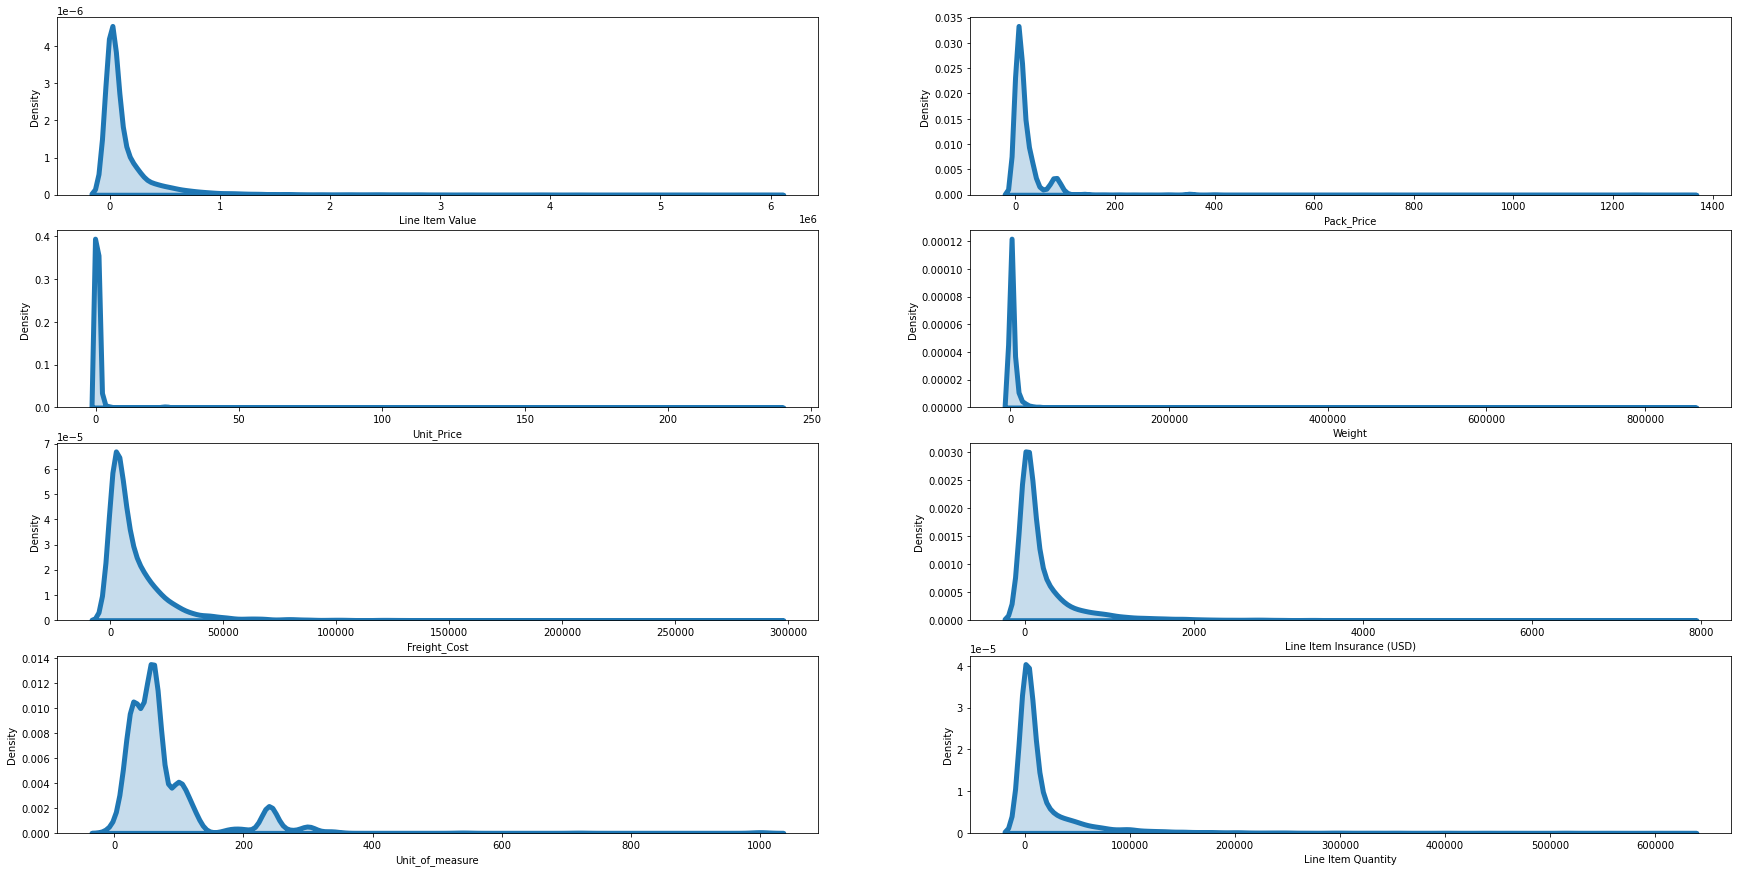

In [18]:
# Checking Distribution of data in columns

fig,ax=plt.subplots(4,2,figsize=(30,15))

row,column=0,0
for col in num_index:
    sns.kdeplot(data[col],ax=ax[row,column],shade=True,linewidth=5,)
    column+=1
    if column==2:
        column=0
        row+=1
    

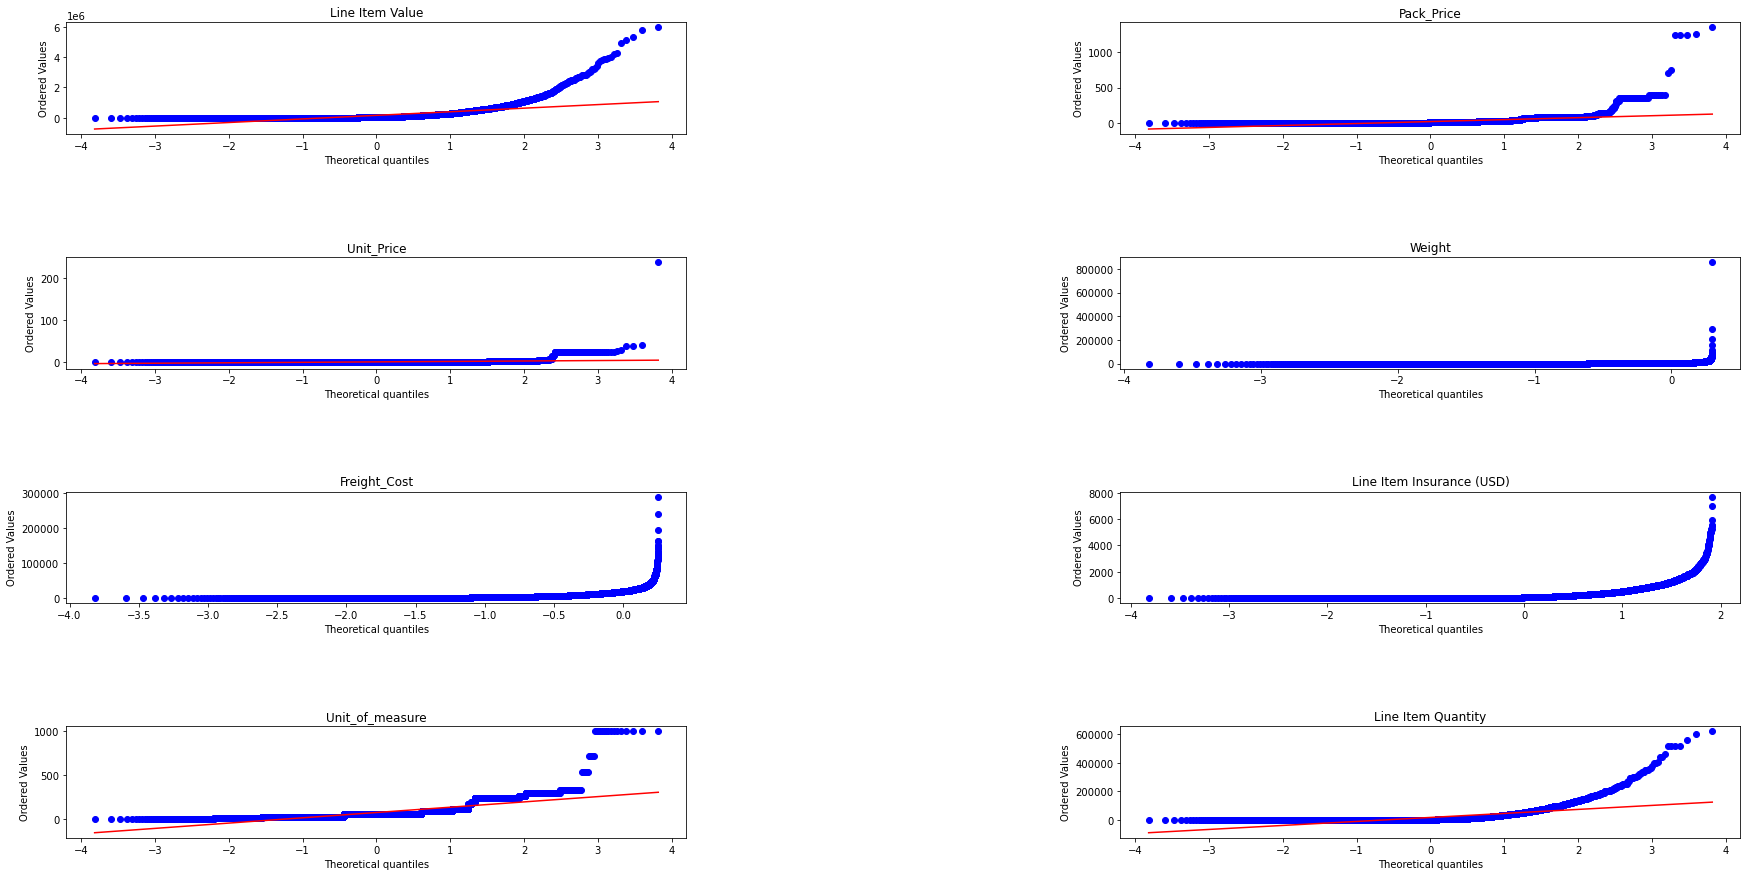

In [19]:
# Checking Normality of distribution using Normal Probability Plot

from scipy import stats

fig,ax=plt.subplots(4,2,figsize=(30,15))
plt.subplots_adjust( 
                    wspace=0.7, 
                    hspace=1.1)

a,b=0,0
for col in num_index:
    stats.probplot(data[col],plot=ax[a,b])
    ax[a,b].set_title(col)
    b+=1
    if b==2:
        b=0
        a+=1

# It is observed that most of the features are Right skewed (might have outliers in the right tail)

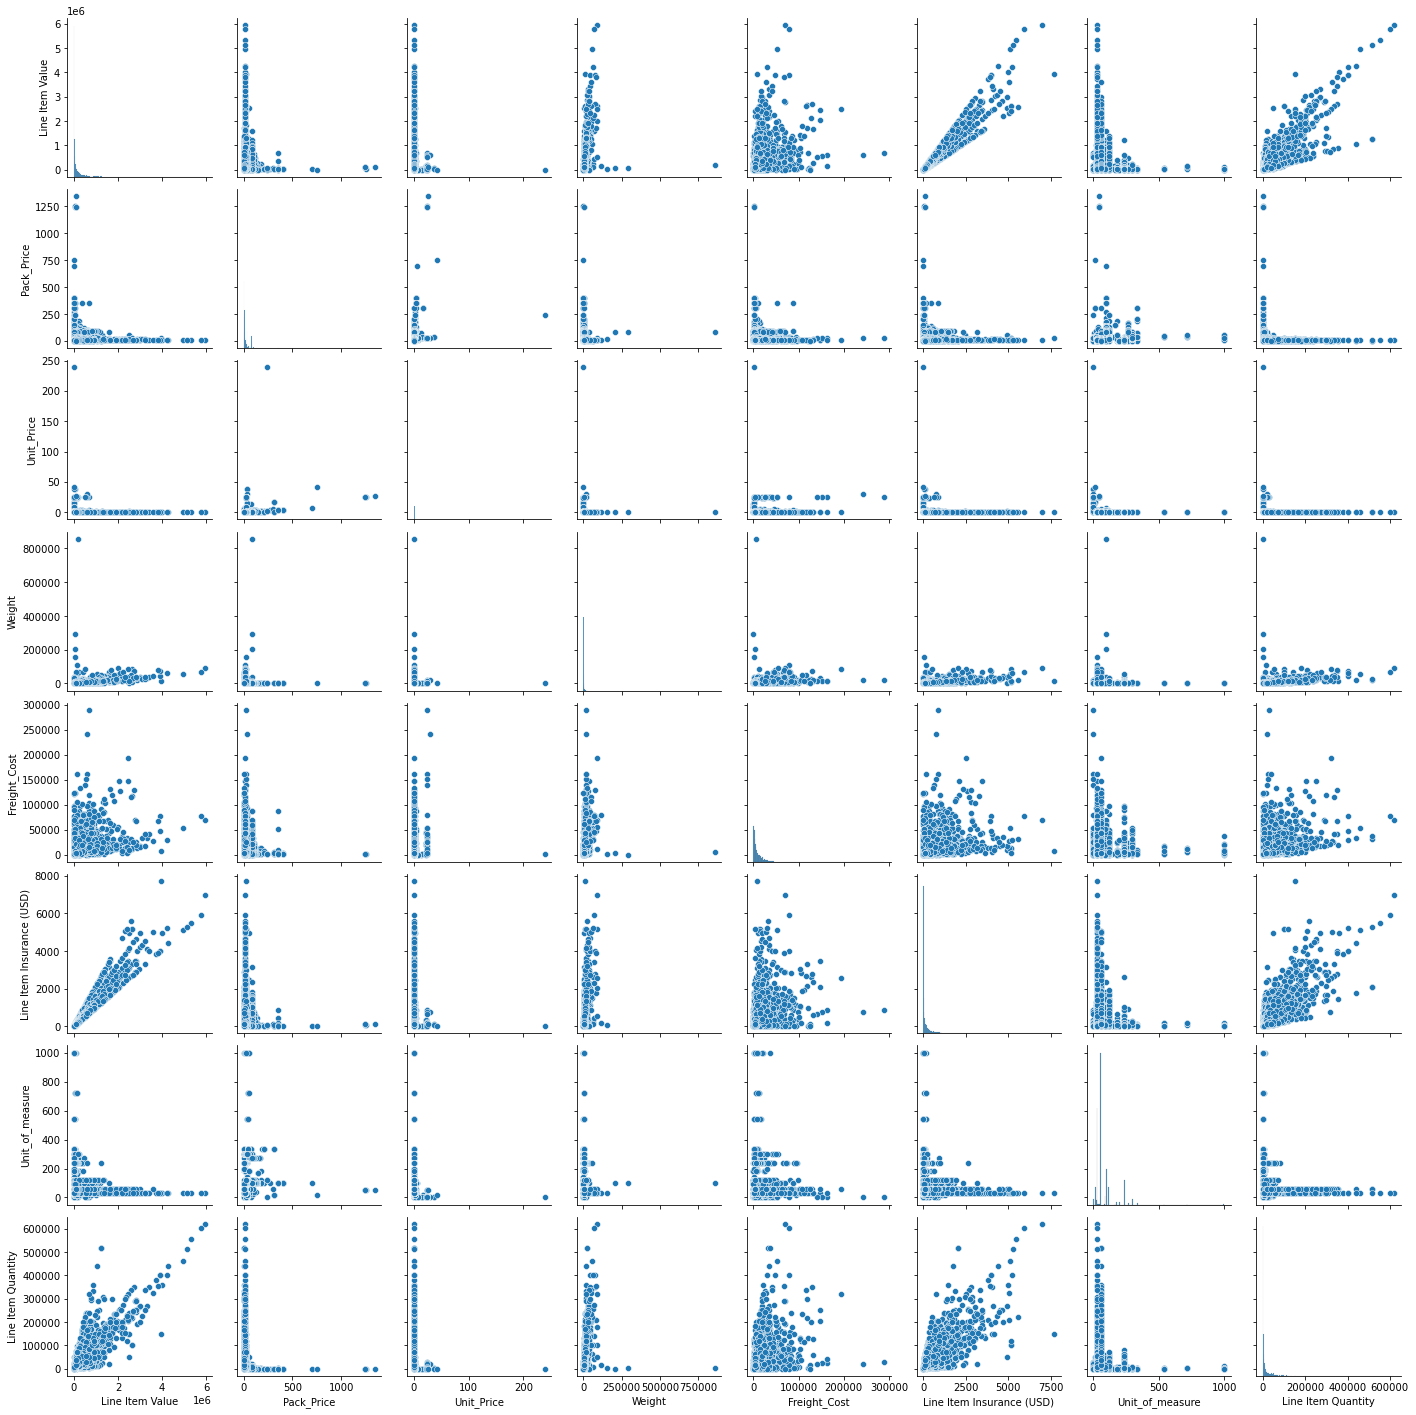

In [20]:
# Visualizing Correlation b/w features ,using Scatter Plots

sns.pairplot(data[num_index])

Text(0, 0.5, 'Shipment Value')

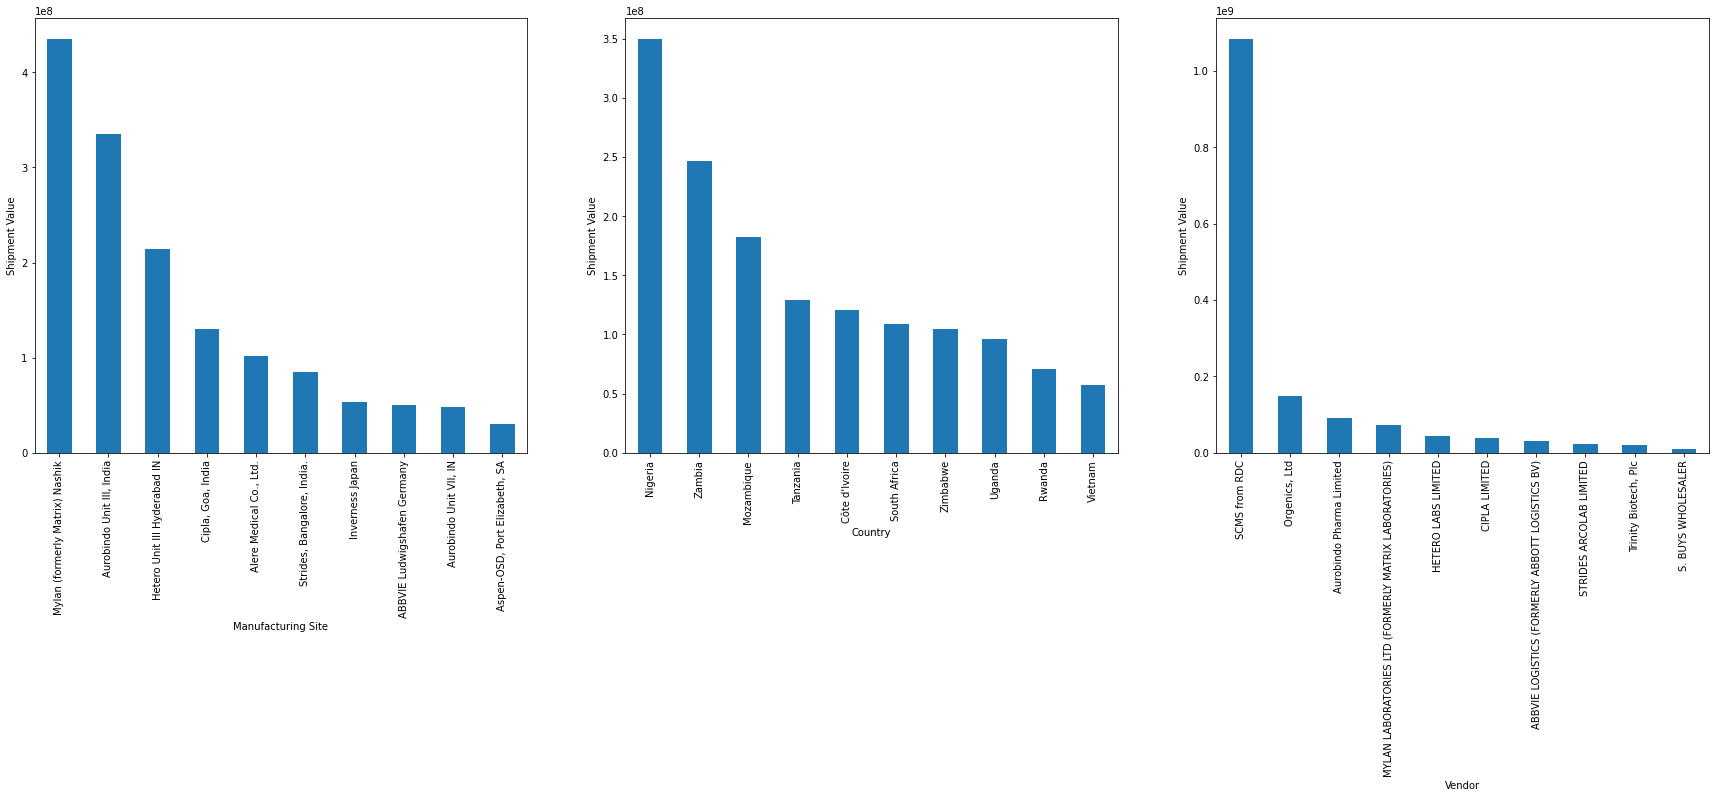

In [21]:
fig,ax=plt.subplots(1,3,figsize=(30,8))

# Top 10 Manufacturing sites by Total Price/Value of Packs produced 
data.groupby(['Manufacturing Site'])['Line Item Value'].sum().nlargest(10).plot(kind='bar',ax=ax[0])
ax[0].set_ylabel('Shipment Value')

# Top 10 Countries by Total Price/Value of Packs produced 
data.groupby(['Country'])['Line Item Value'].sum().nlargest(10).plot(kind='bar',ax=ax[1])
ax[1].set_ylabel('Shipment Value')

# Top 10 Vendors sites by Total Price/Value of Packs produced 
data.groupby(['Vendor'])['Line Item Value'].sum().nlargest(10).plot(kind='bar',ax=ax[2])
ax[2].set_ylabel('Shipment Value')

Text(0, 0.5, 'Shipment Value')

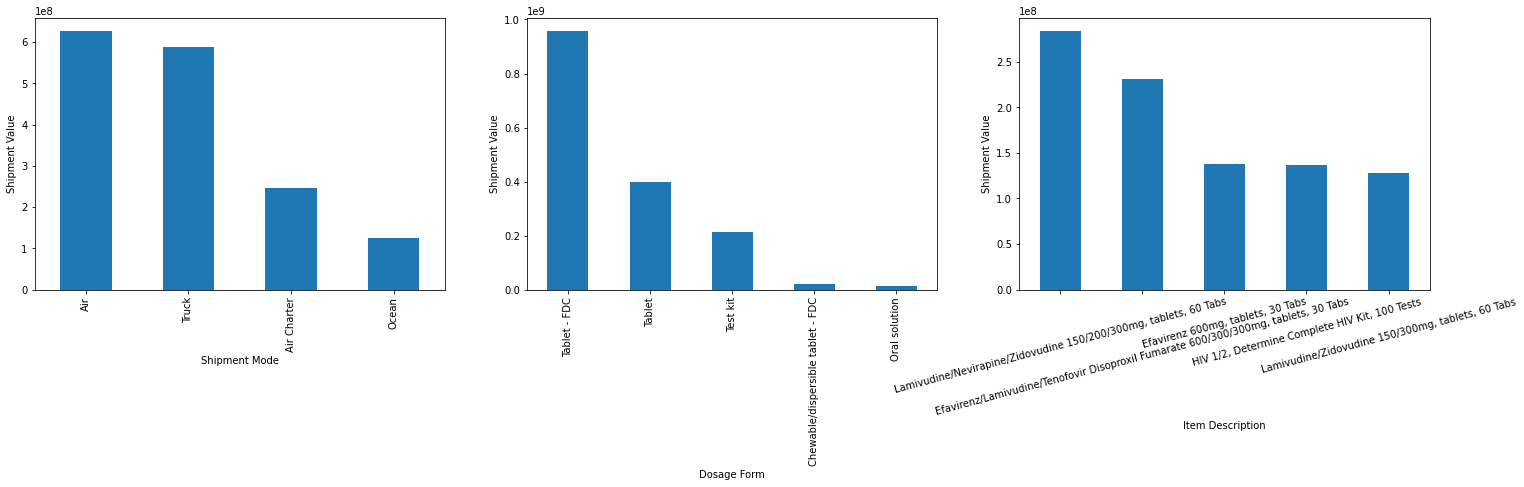

In [22]:
fig,ax=plt.subplots(1,3,figsize=(25,5))
data.groupby(['Shipment Mode'])['Line Item Value'].sum().nlargest(5).plot(kind='bar',ax=ax[0])
ax[0].set_ylabel('Shipment Value')
data.groupby(['Dosage Form'])['Line Item Value'].sum().nlargest(5).plot(kind='bar',ax=ax[1])
ax[1].set_ylabel('Shipment Value')
data.groupby(['Item Description'])['Line Item Value'].sum().nlargest(5).plot(kind='bar',ax=ax[2])
plt.xticks(rotation=15)
ax[2].set_ylabel('Shipment Value')

C:\Users\Mital Patil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Mital Patil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Mital Patil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2]),
 [Text(0, 0, 'Normal Measurement'),
  Text(1, 0, 'See ASN/DN Tag'),
  Text(2, 0, 'Weight Captured Separately')])

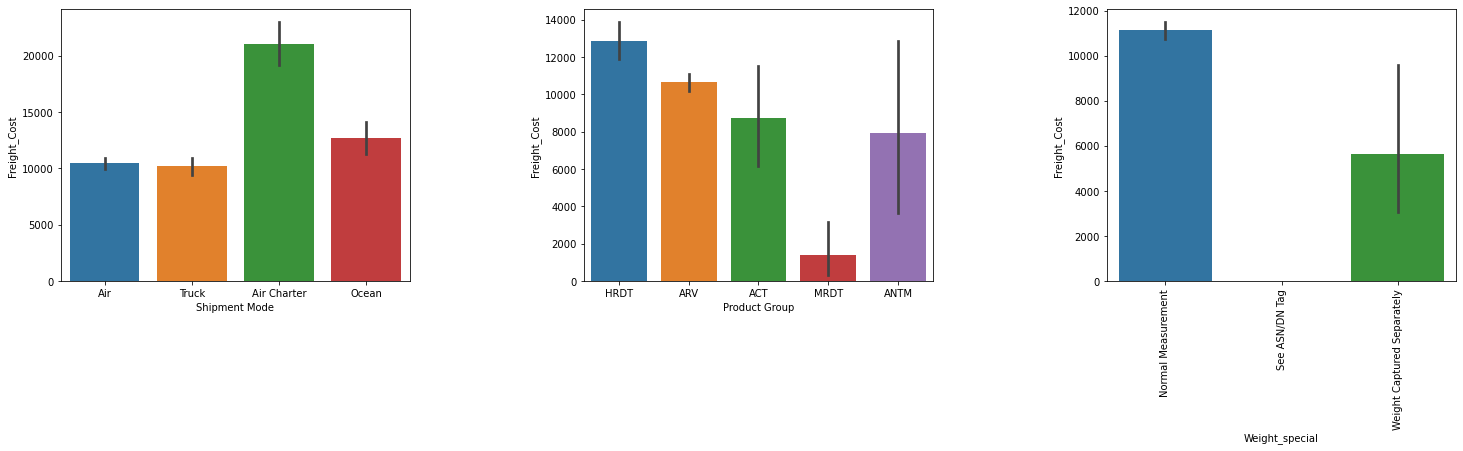

In [23]:
fig,ax=plt.subplots(1,3,figsize=(25,5))
plt.subplots_adjust( wspace=0.5)

sns.barplot('Shipment Mode','Freight_Cost',data=data,ax=ax[0])
sns.barplot('Product Group','Freight_Cost',data=data,ax=ax[1])
sns.barplot('Weight_special','Freight_Cost',data=data,ax=ax[2])
plt.xticks(rotation=90)


In [24]:
# Checking for Null values
data.isnull().sum()


Country                         0
Vendor                          0
Manufacturing Site              0
Brand                           0
Item Description                0
Product Group                   0
Sub Classification              0
Molecule/Test Type              0
Dosage Form                     0
Dosage                       1736
Managed By                      0
Vendor INCO Term                0
Fulfill Via                     0
Shipment Mode                 360
Scheduled Delivery Date         0
Delivered to Client Date        0
Delivery Recorded Date          0
Unit_of_measure                 0
Line Item Quantity              0
Line Item Value                 0
Pack_Price                      0
Unit_Price                      0
First Line Designation          0
Weight                       3952
Weight_special                  0
Freight_Cost                 4126
Freight_cost_special            0
Line Item Insurance (USD)     287
dtype: int64

In [25]:
# Getting Columns with null values

null_val_cols=(data.isnull().sum()[data.isnull().sum()>0]).index
null_val_cols

Index(['Dosage', 'Shipment Mode', 'Weight', 'Freight_Cost',
       'Line Item Insurance (USD)'],
      dtype='object')

In [26]:
# Random Sample Imputation for Categorical Columns
for col in ['Dosage', 'Shipment Mode']:
    rand_samples=data[col].dropna().sample(data[col].isnull().sum())
    rand_samples.index=data[data[col].isnull()].index
    data.loc[data[col].isnull(),col]=rand_samples



In [27]:
# KNN Imputation for numerical columns
from sklearn.impute import KNNImputer

for col in ['Weight', 'Freight_Cost','Line Item Insurance (USD)'] :
        imputer=KNNImputer(n_neighbors=10)
        data[col]=imputer.fit_transform(data[[col]])

In [28]:
data.isnull().sum()

Country                      0
Vendor                       0
Manufacturing Site           0
Brand                        0
Item Description             0
Product Group                0
Sub Classification           0
Molecule/Test Type           0
Dosage Form                  0
Dosage                       0
Managed By                   0
Vendor INCO Term             0
Fulfill Via                  0
Shipment Mode                0
Scheduled Delivery Date      0
Delivered to Client Date     0
Delivery Recorded Date       0
Unit_of_measure              0
Line Item Quantity           0
Line Item Value              0
Pack_Price                   0
Unit_Price                   0
First Line Designation       0
Weight                       0
Weight_special               0
Freight_Cost                 0
Freight_cost_special         0
Line Item Insurance (USD)    0
dtype: int64

In [29]:
data["Shipment_Price"] =data['Freight_Cost']+data['Line Item Value']+data['Line Item Insurance (USD)']
data["Shipment_Price"].round(decimals=2)


0           1571.46
1          10961.62
2          41893.90
3         143607.98
4         167290.20
            ...    
10319     611464.62
10320     148654.38
10321    5156502.01
10322     125109.06
10323      84100.66
Name: Shipment_Price, Length: 10324, dtype: float64

***Encoding Categorical Columns***

**Columns for frequency encode** - *'Country', 'Vendor', 'Manufacturing Site', 'Brand', 'Item Description','Product Group', 'Sub Classification', 'Molecule/Test Type','Dosage Form',
                       'Dosage', 'Managed By', 'Vendor INCO Term', 'Shipment Mode', 'Weight_special', 'Freight_cost_special'*

**Columns for one hot encoding** -- *'Fulfill Via','First Line Designation'* <br>
**Columns for ordinal encoding** --- *can be done in inco terms , shipment mode , -- domain knowledge is needed , moreover wedon't know personal preferences of the distributor , which might benefit him*

**Observed that in all the categorical columns , there are a large number of unique values
We would not like to include all the unique values rather , we encode the top 10 categories and the remaining are classified as Other**

In [30]:
for col in categ_index:
    for i in range( data.shape[0]):
        if data[col].loc[i] in list(data[col].value_counts().head(10).to_dict().keys()):
            continue
        else :
            data[col].loc[i]="Other"


C:\Users\Mital Patil\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [31]:
for cols in categ_index:
    print(f"\n {data[cols].value_counts().head(10)}")


 Other            2512
South Africa     1406
Nigeria          1194
Côte d'Ivoire    1083
Uganda            779
Vietnam           688
Zambia            683
Haiti             655
Mozambique        631
Zimbabwe          538
Name: Country, dtype: int64

 SCMS from RDC                                            5404
Other                                                    1141
Orgenics, Ltd                                             754
S. BUYS WHOLESALER                                        715
Aurobindo Pharma Limited                                  668
Trinity Biotech, Plc                                      356
ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV)           347
PHARMACY DIRECT                                           326
MYLAN LABORATORIES LTD (FORMERLY MATRIX LABORATORIES)     317
HETERO LABS LIMITED                                       277
Name: Vendor, dtype: int64

 Aurobindo Unit III, India         3172
Other                             2052
Mylan (formerly Matri

While Frequency encoding , manually give less frequency for "Other" category as , there are a large no. of insignificant categories which aggregated to a large no.<br>
We do this so that the insignificant categories don't get unnecessarily higher weightage , while training

**Columns to do manual encoding changes**- Country , Vendor , Manufacturing site ,Brand , Item description , Molecule/Test type,Dosage

**Frequency encode -** 'Product Group', 'Sub Classification','Dosage Form','Managed By', 'Vendor INCO Term', 'Shipment Mode', 'Weight_special', 'Freight_cost_special'



In [32]:
country_map=data.Country.value_counts().to_dict()
country_map["Other"]=min(country_map.values())-75
data.Country=data.Country.map((country_map))

In [33]:
vendor_map=data.Vendor.value_counts().to_dict()
vendor_map["Other"]=2
data.Vendor=data.Vendor.map(vendor_map)


In [34]:
manuf_site_map=data['Manufacturing Site'].value_counts().to_dict()
manuf_site_map["Other"]=2
data['Manufacturing Site']=data['Manufacturing Site'].map(manuf_site_map)


In [35]:
brand_map=data.Brand.value_counts().to_dict()
brand_map["Other"]=5
data.Brand=data.Brand.map(brand_map)

In [36]:
item_map=data['Item Description'].value_counts().to_dict()
item_map["Other"]=1
data['Item Description']=data['Item Description'].map(item_map)

In [37]:
test_type_map=data['Molecule/Test Type'].value_counts().to_dict()
test_type_map["Other"]=5
data['Molecule/Test Type']=data['Molecule/Test Type'].map(test_type_map)

In [38]:
dosage_map=data.Dosage.value_counts().to_dict()
dosage_map["Other"]=2
data.Dosage=data.Dosage.map(dosage_map)

In [39]:
prod_group_map=data['Product Group'].value_counts().to_dict()
data['Product Group']=data['Product Group'].map(prod_group_map)

In [40]:
sub_class_map=data['Sub Classification'].value_counts().to_dict()
data['Sub Classification']=data['Sub Classification'].map(sub_class_map)

In [41]:
dosage_form_map=data['Dosage Form'].value_counts().to_dict()
data['Dosage Form']=data['Dosage Form'].map(dosage_form_map)

In [42]:
managed_by_map=data['Managed By'].value_counts().to_dict()
data['Managed By']=data['Managed By'].map(managed_by_map)

In [43]:
inco_term_map=data['Vendor INCO Term'].value_counts().to_dict()
data['Vendor INCO Term']=data['Vendor INCO Term'].map(inco_term_map)

In [44]:
shipment_mode_map=data['Shipment Mode'].value_counts().to_dict()
data['Shipment Mode']=data['Shipment Mode'].map(shipment_mode_map)

In [45]:
wt_spcl_map=data['Weight_special'].value_counts().to_dict()
data['Weight_special']=data['Weight_special'].map(wt_spcl_map)

In [46]:
freight_spcl_map=data['Freight_cost_special'].value_counts().to_dict()
data['Freight_cost_special']=data['Freight_cost_special'].map(freight_spcl_map)

**one hot encoding--**'Fulfill Via','First Line Designation'

In [47]:
data['Fulfill Via']=pd.get_dummies(data['Fulfill Via'],drop_first=True,dtype='float64')
#---From RDC-1 ; Direct Drop-0

In [48]:
data['First Line Designation']=pd.get_dummies(data['First Line Designation'],drop_first=True,dtype='float64') 
#---Yes-1 ; No-0

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [49]:
data

,Country,Vendor,Manufacturing Site,Brand,Item Description,Product Group,Sub Classification,Molecule/Test Type,Dosage Form,Dosage,Managed By,Vendor INCO Term,Fulfill Via,Shipment Mode,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Unit_of_measure,Line Item Quantity,Line Item Value,Pack_Price,Unit_Price,First Line Designation,Weight,Weight_special,Freight_Cost,Freight_cost_special,Line Item Insurance (USD),Shipment_Price
0,1083,2,2,5,1,1728,1567,5,1575,710,10265,2778,0.0,6337,2006-06-02,2006-06-02,2006-06-02,30,19,551.00,29.00,0.97,1.0,13.000000,6372,780.340000,6198,240.117626,1.571458e+03
1,688,668,3172,7285,1,8550,1955,877,214,659,10265,2778,0.0,6337,2006-11-14,2006-11-14,2006-11-14,240,1000,6200.00,6.20,0.03,1.0,358.000000,6372,4521.500000,6198,240.117626,1.096162e+04
2,1083,2,2,799,577,1728,1567,577,1575,1178,10265,397,0.0,6337,2006-08-27,2006-08-27,2006-08-27,100,500,40000.00,80.00,0.80,1.0,171.000000,6372,1653.780000,6198,240.117626,4.189390e+04
3,688,2,2,7285,378,8550,6595,592,3532,522,10265,2778,0.0,6337,2006-09-01,2006-09-01,2006-09-01,60,31920,127360.80,3.99,0.07,1.0,1855.000000,6372,16007.060000,6198,240.117626,1.436080e+05
4,688,668,3172,7285,1,8550,6595,5,729,2,10265,2778,0.0,6337,2006-08-11,2006-08-11,2006-08-11,60,38000,121600.00,3.20,0.05,1.0,7590.000000,6372,45450.080000,6198,240.117626,1.672902e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,538,5404,2,7285,1,8550,1955,707,239,2,10265,5404,1.0,2932,2015-07-31,2015-07-15,2015-07-20,60,166571,599655.60,3.60,0.06,0.0,3424.441306,2445,11103.234819,2445,705.790000,6.114646e+05
10320,1083,5404,869,7285,597,8550,6595,689,2749,739,10265,5404,1.0,2932,2015-07-31,2015-08-06,2015-08-07,60,21072,137389.44,6.52,0.11,0.0,3424.441306,2445,11103.234819,2445,161.710000,1.486544e+05
10321,683,5404,2,7285,1,8550,6595,5,2749,2,10265,5404,1.0,2932,2015-08-31,2015-08-25,2015-09-03,30,514526,5140114.74,9.99,0.33,0.0,3424.441306,1507,11103.234819,1442,5284.040000,5.156502e+06
10322,538,5404,1415,7285,597,8550,6595,689,2749,739,10265,5404,1.0,2932,2015-09-09,2015-08-04,2015-08-11,60,17465,113871.80,6.52,0.11,1.0,1392.000000,6372,11103.234819,1442,134.030000,1.251091e+05


In [50]:
from sklearn.preprocessing import FunctionTransformer
func = FunctionTransformer(np.log1p)
trans = func.fit_transform(data[num_index])
trans.dtypes


Line Item Value              float64
Pack_Price                   float64
Unit_Price                   float64
Weight                       float64
Freight_Cost                 float64
Line Item Insurance (USD)    float64
Unit_of_measure              float64
Line Item Quantity           float64
dtype: object

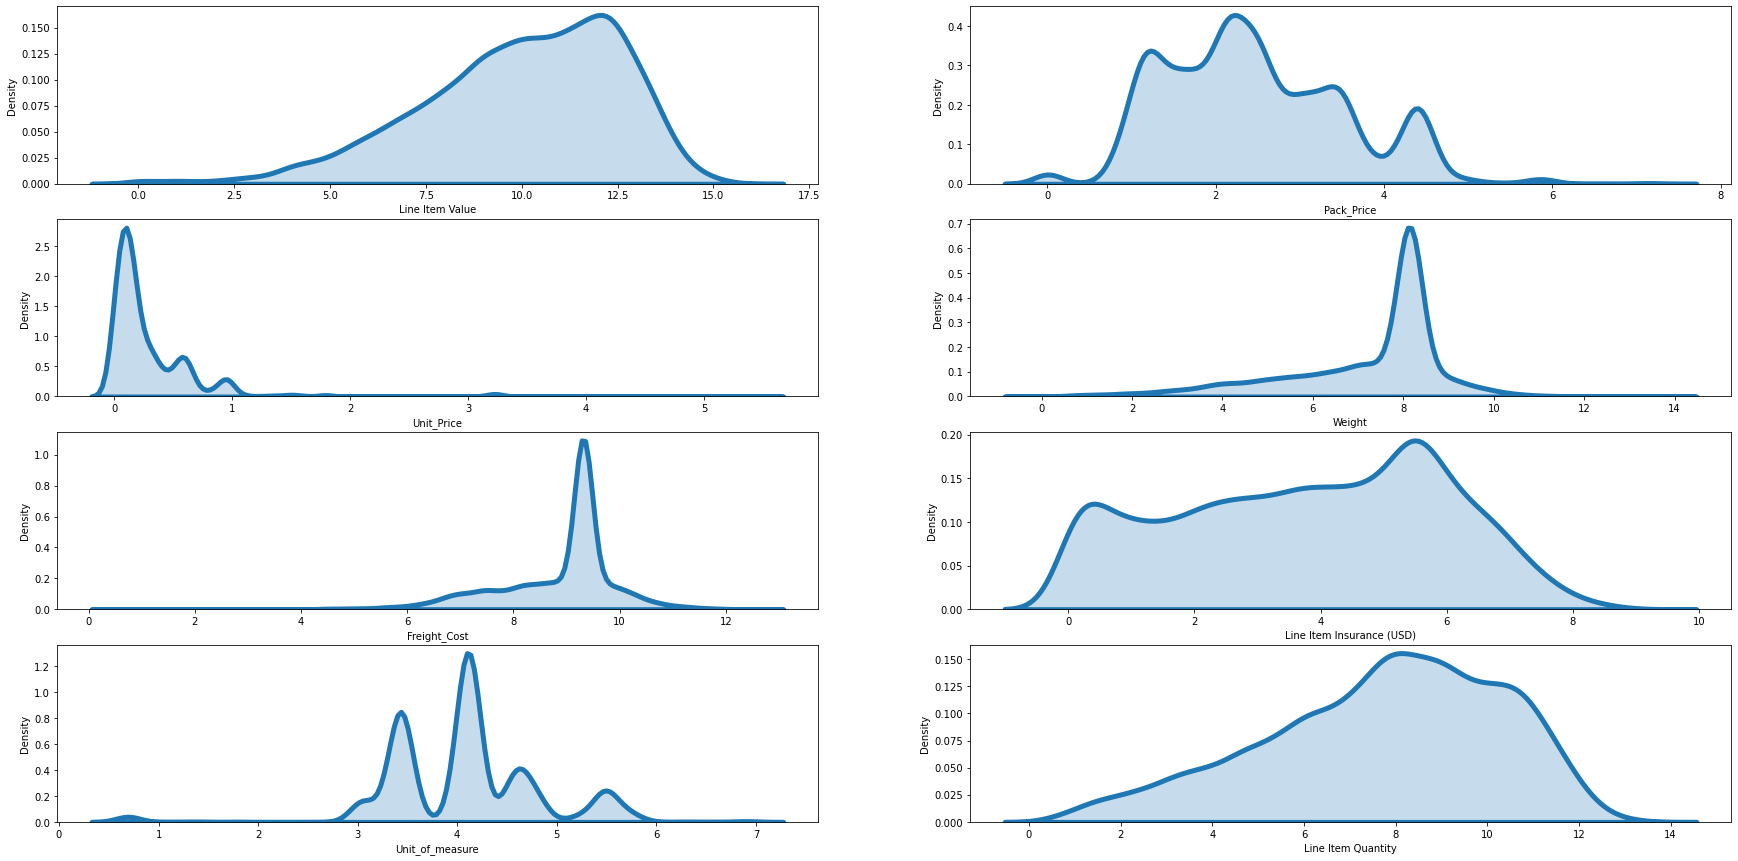

In [51]:
fig,ax=plt.subplots(4,2,figsize=(30,15))

row,column=0,0
for col in num_index:
    sns.kdeplot(trans[col],ax=ax[row,column],shade=True,linewidth=5)
    column+=1
    if column==2:
        column=0
        row+=1
    

In [52]:
data[num_index]=trans
data.head(10)

,Country,Vendor,Manufacturing Site,Brand,Item Description,Product Group,Sub Classification,Molecule/Test Type,Dosage Form,Dosage,Managed By,Vendor INCO Term,Fulfill Via,Shipment Mode,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Unit_of_measure,Line Item Quantity,Line Item Value,Pack_Price,Unit_Price,First Line Designation,Weight,Weight_special,Freight_Cost,Freight_cost_special,Line Item Insurance (USD),Shipment_Price
0,1083,2,2,5,1,1728,1567,5,1575,710,10265,2778,0.0,6337,2006-06-02,2006-06-02,2006-06-02,3.433987,2.995732,6.313548,3.401197,0.678034,1.0,2.639057,6372,6.661010,6198,5.485285,1571.457626
1,688,668,3172,7285,1,8550,1955,877,214,659,10265,2778,0.0,6337,2006-11-14,2006-11-14,2006-11-14,5.484797,6.908755,8.732466,1.974081,0.029559,1.0,5.883322,6372,8.416820,6198,5.485285,10961.617626
2,1083,2,2,799,577,1728,1567,577,1575,1178,10265,397,0.0,6337,2006-08-27,2006-08-27,2006-08-27,4.615121,6.216606,10.596660,4.394449,0.587787,1.0,5.147494,6372,7.411423,6198,5.485285,41893.897626
3,688,2,2,7285,378,8550,6595,592,3532,522,10265,2778,0.0,6337,2006-09-01,2006-09-01,2006-09-01,4.110874,10.371019,11.754787,1.607436,0.067659,1.0,7.526179,6372,9.680848,6198,5.485285,143607.977626
4,688,668,3172,7285,1,8550,6595,5,729,2,10265,2778,0.0,6337,2006-08-11,2006-08-11,2006-08-11,4.110874,10.545368,11.708500,1.435085,0.048790,1.0,8.934719,6372,10.724392,6198,5.485285,167290.197626
5,1194,668,3172,7285,1,8550,1955,529,727,659,10265,2778,0.0,6337,2006-09-28,2006-09-28,2006-09-28,5.484797,6.033086,7.708231,1.848455,0.019803,1.0,6.224558,6372,8.686332,6198,5.485285,8386.137626
6,683,2,2,5,1,8550,1955,1125,729,1101,10265,15,0.0,6337,2007-01-08,2007-01-08,2007-01-08,4.510860,4.912655,8.383662,3.508556,0.307485,1.0,5.796058,6372,9.315082,1442,5.485285,15717.352445
7,155,668,3172,7285,623,8550,6595,877,3532,1101,10265,2778,0.0,6337,2006-11-24,2006-11-24,2006-11-24,4.110874,9.721246,11.015930,1.536867,0.058269,1.0,7.299121,6372,8.734465,6198,5.485285,67287.077626
8,1194,668,3172,7285,1,8550,6595,5,729,2,10265,2778,0.0,6337,2006-12-07,2006-12-07,2006-12-07,4.110874,5.613128,6.279178,1.081805,0.029559,0.0,8.138986,2445,9.315082,2445,5.485285,11875.702445
9,683,347,2,250,1,8550,6595,633,3532,480,10265,275,0.0,6337,2007-01-30,2007-01-30,2007-01-30,4.795791,7.937732,11.653392,3.740048,0.292670,1.0,6.467699,6372,9.315082,1442,5.485285,126423.352445


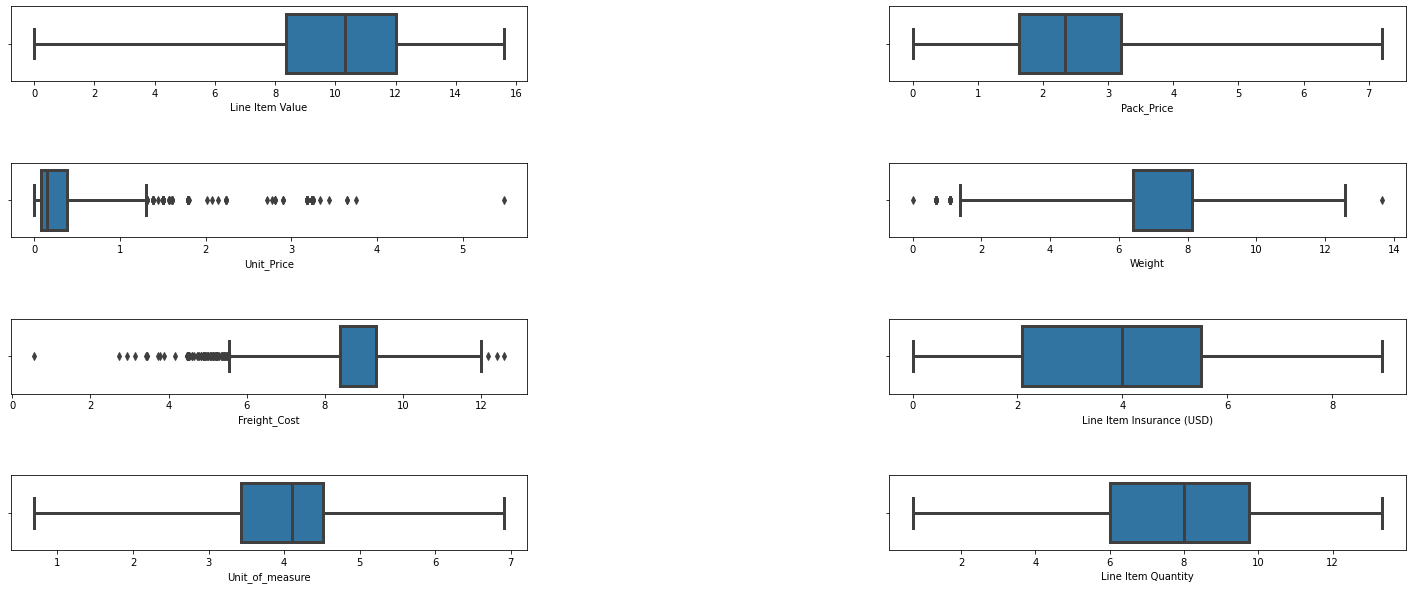

In [53]:
# Outlier detection , feature selection/creation , model testing

fig,ax=plt.subplots(4,2,figsize=(25,10),squeeze=False)
plt.subplots_adjust( 
                    wspace=0.7, 
                    hspace=1.1)
i,j=0,0
for col in num_index:
    sns.boxplot(x=data[col],ax=ax[i,j],whis=3,linewidth=3,)

    j+=1
    if j==2:
        j=0
        i+=1

# we should think carefully about what is an outlier, why is it an outlier, and what should you do with the data if you choose to keep the outliers in the data.
# Note that "outliers" are rare. If they are not rare, they are either no outliers or your method/data collection is seriousely flawed 

# It is important to figure out if a certain data value is a "true outlier" or a "influence or leverage point". 
# Is it due to some measurement error or is it maybe due to excessive variability in the data
    

**sometimes outliers can be informative as well as value to treat as outlier purely based on business usecase**

Unit of Measure(per pack)--although we see outliers here,they might not be actually outliers. Since , Packs can be filled with pills,test kits or a combo of both ;since both occupy spaces varyingly , this leads too excessive variability in data.So,we dont remove outliers here
                             

Freight Cost - This can excessively vary depending on the distance and route of shipment for the particular project.However ,we can't call them as outliers as they are
not rare and contain important information.Hence,we don't completely impute the outliers 

Similarly for all other columns,they definitely have some important information.Hence,we don't completely impute the outliers 
We manually impute those points as outliers,after which the data points become very sparse ; so that our model doesn't overfit 

In [54]:
# Outlier Imputation for Line Item Value
upper_limit = data["Unit_Price"].quantile(0.99)
data["Unit_Price"]=data[data["Unit_Price"]<upper_limit]
data["Unit_Price"]

0        1083.0
1         688.0
2        1083.0
3         688.0
4         688.0
          ...  
10319     538.0
10320    1083.0
10321     683.0
10322     538.0
10323     538.0
Name: Unit_Price, Length: 10324, dtype: object

In [55]:
lower_limit = data["Freight_Cost"].quantile(0.01)
data["Freight_Cost"]=data[data["Freight_Cost"]>lower_limit]
data["Freight_Cost"]


0        1083.0
1         688.0
2        1083.0
3         688.0
4         688.0
          ...  
10319     538.0
10320    1083.0
10321     683.0
10322     538.0
10323     538.0
Name: Freight_Cost, Length: 10324, dtype: object

In [56]:
data = data.dropna()

In [57]:
data["Freight_Cost"]=data["Freight_Cost"].astype("float64")
data["Unit_Price"]=data["Unit_Price"].astype("float64")


<ipython-input-57-b05d720f3189>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Freight_Cost"]=data["Freight_Cost"].astype("float64")
<ipython-input-57-b05d720f3189>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Unit_Price"]=data["Unit_Price"].astype("float64")


In [58]:
data["Freight_Cost"]

0        1083.0
1         688.0
2        1083.0
3         688.0
4         688.0
          ...  
10319     538.0
10320    1083.0
10321     683.0
10322     538.0
10323     538.0
Name: Freight_Cost, Length: 10082, dtype: float64

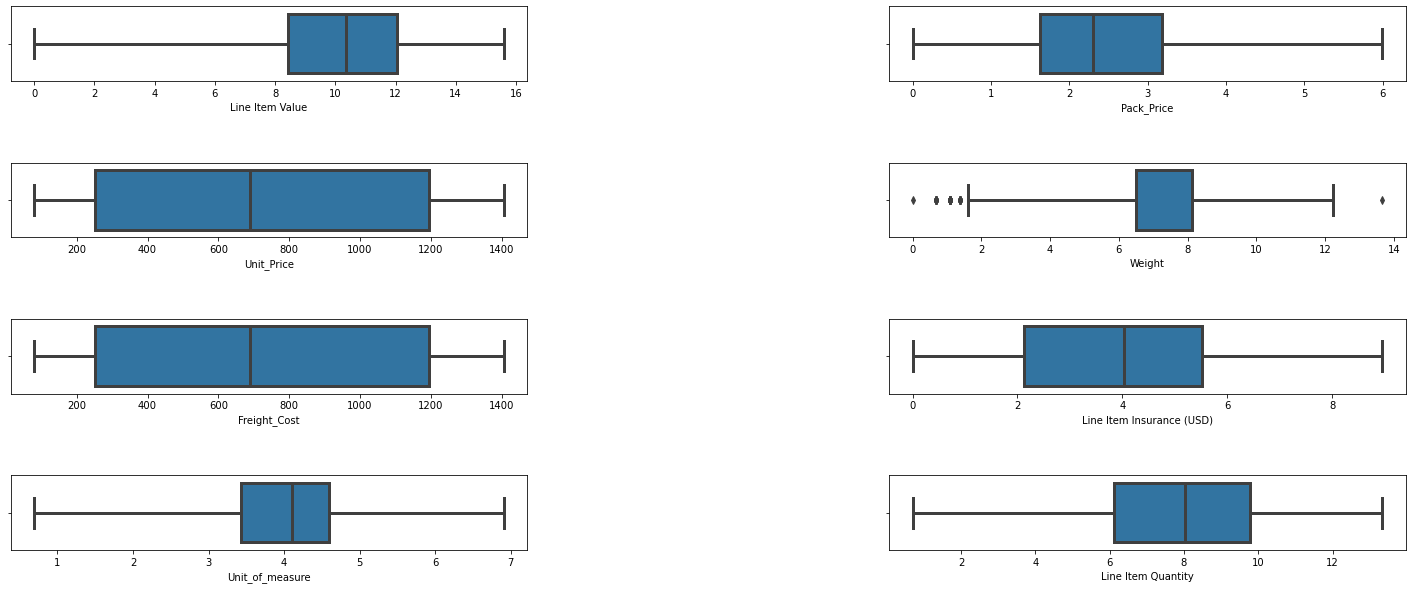

In [59]:
fig,ax=plt.subplots(4,2,figsize=(25,10),squeeze=False)
plt.subplots_adjust( 
                    wspace=0.7, 
                    hspace=1.1)
i,j=0,0
for col in num_index:
    sns.boxplot(x=data[col],ax=ax[i,j],whis=3,linewidth=3,)

    j+=1
    if j==2:
        j=0
        i+=1

In [60]:
# Feature Creation & Target Column Creation

# New Features - important KPI's in logistics )
#As late delievery can cause additional charges because stuck of the shipment can be main reason for delay in delievery which largely affects cash flow and sure it will come with additional holding charges

# Delay in Delivery
data["dlvry_delay"]=data['Delivered to Client Date']-data['Scheduled Delivery Date'] 
# +ve days denotes Late delivery
#-ve sign denotes early delievery

# Delay in Delivery_verification_time
data["dlvry_verif_time_delay"]=data['Delivery Recorded Date']-data['Delivered to Client Date']

# value of goods = ( Line Item Value + Line Item insurance )/Line Item Quantity assigns higher value to sales driving shipments,rather than volume driving shipments
data["item_value"]=(data['Line Item Value']+data['Line Item Insurance (USD)'])/data['Line Item Quantity']

<ipython-input-60-386192c6f085>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["dlvry_delay"]=data['Delivered to Client Date']-data['Scheduled Delivery Date']
<ipython-input-60-386192c6f085>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["dlvry_verif_time_delay"]=data['Delivery Recorded Date']-data['Delivered to Client Date']
<ipython-input-60-386192c6f085>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [61]:
data.dtypes

Country                                int64
Vendor                                 int64
Manufacturing Site                     int64
Brand                                  int64
Item Description                       int64
Product Group                          int64
Sub Classification                     int64
Molecule/Test Type                     int64
Dosage Form                            int64
Dosage                                 int64
Managed By                             int64
Vendor INCO Term                       int64
Fulfill Via                          float64
Shipment Mode                          int64
Scheduled Delivery Date       datetime64[ns]
Delivered to Client Date      datetime64[ns]
Delivery Recorded Date        datetime64[ns]
Unit_of_measure                      float64
Line Item Quantity                   float64
Line Item Value                      float64
Pack_Price                           float64
Unit_Price                           float64
First Line

In [62]:
#As after converting datatype from timedelta to numeric values will get converted in the form of nano seconds
# to convert nano seconds in days
data["dlvry_delay"]=pd.to_numeric(data.dlvry_delay)/(60*60*24*(10**9))
data["dlvry_verif_time_delay"]=pd.to_numeric(data.dlvry_verif_time_delay)/(60*60*24*(10**9))

<ipython-input-62-e10cca558b5c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["dlvry_delay"]=pd.to_numeric(data.dlvry_delay)/(60*60*24*(10**9))
<ipython-input-62-e10cca558b5c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["dlvry_verif_time_delay"]=pd.to_numeric(data.dlvry_verif_time_delay)/(60*60*24*(10**9))


In [63]:
#data=data.drop(columns=["dlvry_delay_indays"])
#data

In [64]:
# Rearranging data and deleting date columns

data=data[['Country', 'Vendor', 'Manufacturing Site', 'Brand', 'Item Description',
       'Product Group', 'Sub Classification', 'Molecule/Test Type',
       'Dosage Form', 'Dosage', 'Managed By', 'Vendor INCO Term',
       'Fulfill Via', 'Shipment Mode', 'dlvry_delay','dlvry_verif_time_delay',
       'Unit_of_measure', 'Line Item Quantity', 'Line Item Value',
       'Pack_Price', 'Unit_Price', 'First Line Designation',
       'Weight', 'Weight_special', 'Freight_Cost',
       'Freight_cost_special', 'Line Item Insurance (USD)', 'item_value', 'Shipment_Price']]

data.head()

,Country,Vendor,Manufacturing Site,Brand,Item Description,Product Group,Sub Classification,Molecule/Test Type,Dosage Form,Dosage,Managed By,Vendor INCO Term,Fulfill Via,Shipment Mode,dlvry_delay,dlvry_verif_time_delay,Unit_of_measure,Line Item Quantity,Line Item Value,Pack_Price,Unit_Price,First Line Designation,Weight,Weight_special,Freight_Cost,Freight_cost_special,Line Item Insurance (USD),item_value,Shipment_Price
0,1083,2,2,5,1,1728,1567,5,1575,710,10265,2778,0.0,6337,0.0,0.0,3.433987,2.995732,6.313548,3.401197,1083.0,1.0,2.639057,6372,1083.0,6198,5.485285,3.938547,1571.457626
1,688,668,3172,7285,1,8550,1955,877,214,659,10265,2778,0.0,6337,0.0,0.0,5.484797,6.908755,8.732466,1.974081,688.0,1.0,5.883322,6372,688.0,6198,5.485285,2.057932,10961.617626
2,1083,2,2,799,577,1728,1567,577,1575,1178,10265,397,0.0,6337,0.0,0.0,4.615121,6.216606,10.596660,4.394449,1083.0,1.0,5.147494,6372,1083.0,6198,5.485285,2.586933,41893.897626
3,688,2,2,7285,378,8550,6595,592,3532,522,10265,2778,0.0,6337,0.0,0.0,4.110874,10.371019,11.754787,1.607436,688.0,1.0,7.526179,6372,688.0,6198,5.485285,1.662331,143607.977626
4,688,668,3172,7285,1,8550,6595,5,729,2,10265,2778,0.0,6337,0.0,0.0,4.110874,10.545368,11.708500,1.435085,688.0,1.0,8.934719,6372,688.0,6198,5.485285,1.630459,167290.197626


In [65]:
x = data.drop(columns=["Shipment_Price"])
y = data["Shipment_Price"]

In [66]:
x.corr()


,Country,Vendor,Manufacturing Site,Brand,Item Description,Product Group,Sub Classification,Molecule/Test Type,Dosage Form,Dosage,Managed By,Vendor INCO Term,Fulfill Via,Shipment Mode,dlvry_delay,dlvry_verif_time_delay,Unit_of_measure,Line Item Quantity,Line Item Value,Pack_Price,Unit_Price,First Line Designation,Weight,Weight_special,Freight_Cost,Freight_cost_special,Line Item Insurance (USD),item_value
Country,1.000000,-0.104203,0.138743,0.049606,-0.028879,0.253054,0.173666,0.080302,0.042453,0.031835,-0.107025,-0.203703,-0.114554,-0.385183,-0.106126,-0.087470,0.047635,-0.049418,-0.046903,-0.023375,1.000000,-0.124702,0.193720,-0.222872,1.000000,-0.237411,-0.022839,0.047661
Vendor,-0.104203,1.000000,0.265404,0.453076,0.119674,0.367956,0.297180,0.168012,0.184876,0.073365,0.073315,0.938607,0.996993,-0.196292,-0.089995,0.078166,-0.009701,0.315049,0.150723,-0.374440,-0.104203,-0.105035,0.108931,0.058778,-0.104203,0.043431,0.156125,-0.312953
Manufacturing Site,0.138743,0.265404,1.000000,0.594033,0.108718,0.376696,0.162951,0.315385,0.017663,0.190132,0.013235,0.233315,0.246902,-0.129807,0.016728,-0.020344,0.067577,0.073340,-0.083155,-0.362332,0.138743,-0.123856,0.094836,-0.055848,0.138743,-0.060135,-0.083490,-0.273233
Brand,0.049606,0.453076,0.594033,1.000000,0.190535,0.611040,0.436540,0.300077,0.291137,0.169483,0.023917,0.453187,0.451512,-0.269625,-0.014131,0.044819,-0.135610,0.389027,0.084303,-0.681793,0.049606,-0.146296,0.229440,-0.028870,0.049606,-0.037918,0.073937,-0.524378
Item Description,-0.028879,0.119674,0.108718,0.190535,1.000000,-0.066456,0.272767,0.593628,0.414531,0.463743,0.034638,0.165933,0.109836,-0.063010,0.011940,-0.003409,-0.219854,0.295817,0.276239,-0.069609,-0.028879,0.009346,0.147338,0.073391,-0.028879,0.063596,0.278170,-0.054937
Product Group,0.253054,0.367956,0.376696,0.611040,-0.066456,1.000000,0.642782,0.270480,0.305401,0.016828,-0.026247,0.206093,0.373185,-0.301987,-0.093606,0.023165,0.050682,0.229692,0.011854,-0.545498,0.253054,-0.189851,0.234441,-0.166931,0.253054,-0.167112,-0.011621,-0.378759
Sub Classification,0.173666,0.297180,0.162951,0.436540,0.272767,0.642782,1.000000,0.065706,0.723125,0.187678,-0.006637,0.220101,0.303419,-0.241254,-0.056915,0.006632,-0.329744,0.326532,0.255972,-0.227951,0.173666,-0.116132,0.223461,-0.064849,0.173666,-0.072303,0.251341,-0.140180
Molecule/Test Type,0.080302,0.168012,0.315385,0.300077,0.593628,0.270480,0.065706,1.000000,0.221221,0.458383,-0.014690,0.122173,0.155344,-0.104769,-0.015775,0.006510,0.184485,0.186413,0.085705,-0.244199,0.080302,-0.072026,0.153489,-0.035755,0.080302,-0.036446,0.069832,-0.198072
Dosage Form,0.042453,0.184876,0.017663,0.291137,0.414531,0.305401,0.723125,0.221221,1.000000,0.406532,0.009730,0.159943,0.192273,-0.148302,-0.009624,0.028214,-0.362710,0.317137,0.322370,-0.058050,0.042453,-0.013453,0.121009,0.043920,0.042453,0.034643,0.302552,-0.037359
Dosage,0.031835,0.073365,0.190132,0.169483,0.463743,0.016828,0.187678,0.458383,0.406532,1.000000,-0.006468,0.095015,0.069363,-0.048832,0.007284,0.001269,-0.048212,0.082358,0.059446,-0.055886,0.031835,-0.061342,0.068304,-0.026130,0.031835,-0.024055,0.054751,-0.030067


<AxesSubplot:>

<Figure size 720x720 with 0 Axes>

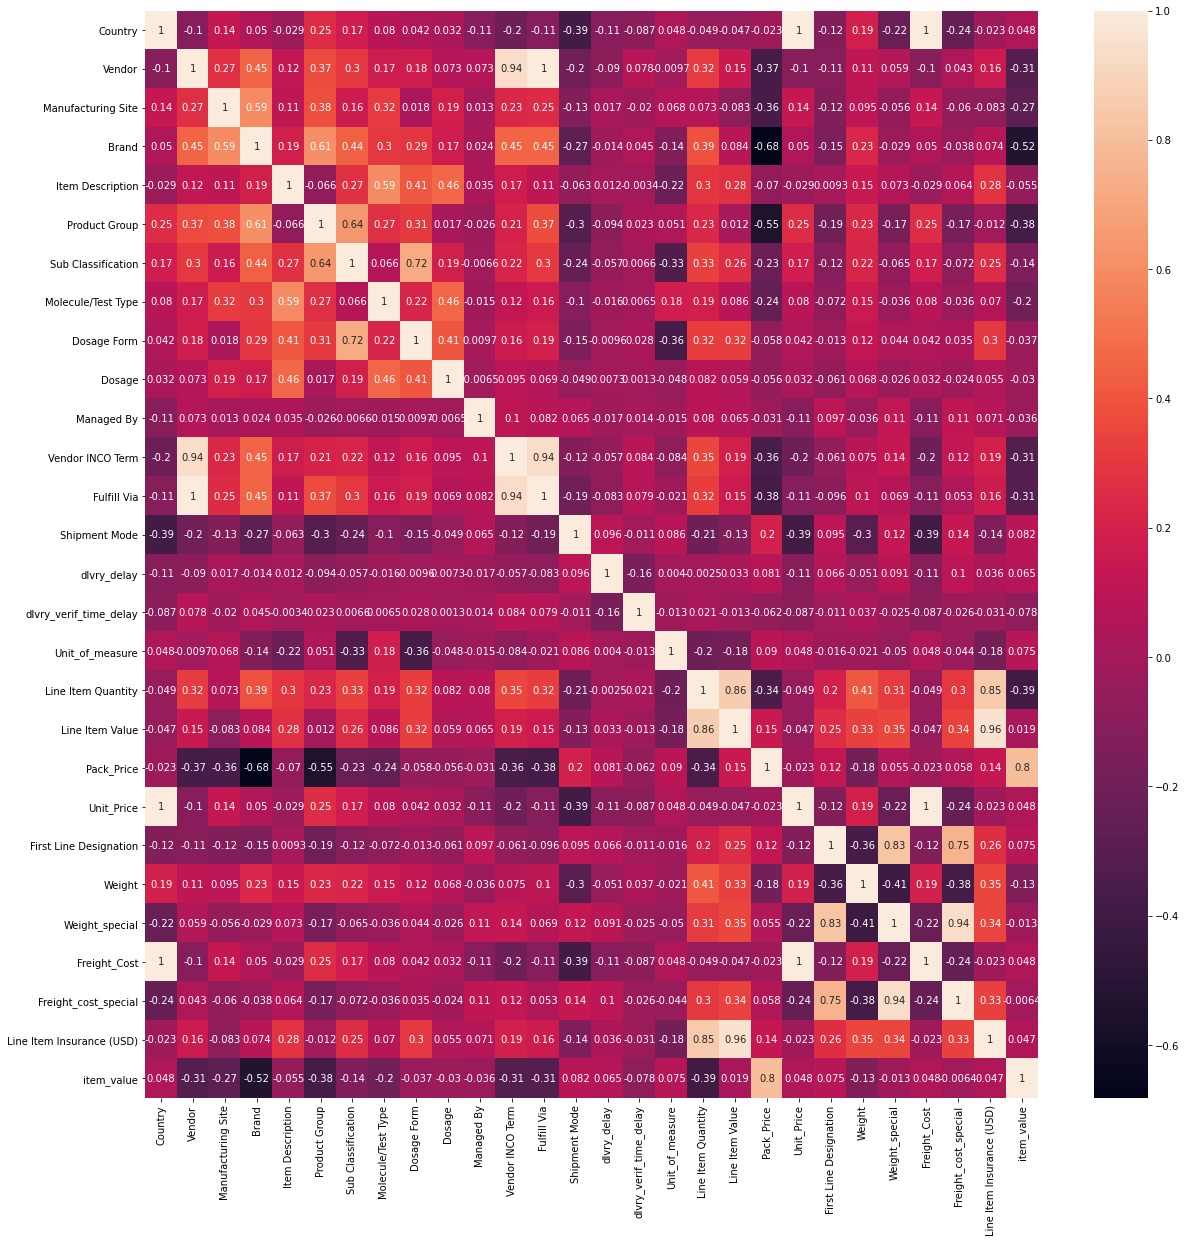

In [67]:
# Feature Removal
plt.figure(figsize=(10,10))
corr=x.corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(x[top_features].corr(),annot=True)

In [68]:
def correlation(dataset, threshold):
    col_corr = set() 
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold and i!=j: # we are interested in absolute coeff value
                colname = corr_matrix.columns[j]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [69]:
correlation(x,0.9)

{'Country',
 'Line Item Value',
 'Unit_Price',
 'Vendor',
 'Vendor INCO Term',
 'Weight_special'}

In [70]:
# Removing the highly correlated columns - {'Vendor INCO Term', 'Vendor', 'Line Item Value', 'Weight_special'}

data=data.drop(['Vendor INCO Term', 'Vendor', 'Line Item Value', 'Weight_special'],axis=1)
data.head()


,Country,Manufacturing Site,Brand,Item Description,Product Group,Sub Classification,Molecule/Test Type,Dosage Form,Dosage,Managed By,Fulfill Via,Shipment Mode,dlvry_delay,dlvry_verif_time_delay,Unit_of_measure,Line Item Quantity,Pack_Price,Unit_Price,First Line Designation,Weight,Freight_Cost,Freight_cost_special,Line Item Insurance (USD),item_value,Shipment_Price
0,1083,2,5,1,1728,1567,5,1575,710,10265,0.0,6337,0.0,0.0,3.433987,2.995732,3.401197,1083.0,1.0,2.639057,1083.0,6198,5.485285,3.938547,1571.457626
1,688,3172,7285,1,8550,1955,877,214,659,10265,0.0,6337,0.0,0.0,5.484797,6.908755,1.974081,688.0,1.0,5.883322,688.0,6198,5.485285,2.057932,10961.617626
2,1083,2,799,577,1728,1567,577,1575,1178,10265,0.0,6337,0.0,0.0,4.615121,6.216606,4.394449,1083.0,1.0,5.147494,1083.0,6198,5.485285,2.586933,41893.897626
3,688,2,7285,378,8550,6595,592,3532,522,10265,0.0,6337,0.0,0.0,4.110874,10.371019,1.607436,688.0,1.0,7.526179,688.0,6198,5.485285,1.662331,143607.977626
4,688,3172,7285,1,8550,6595,5,729,2,10265,0.0,6337,0.0,0.0,4.110874,10.545368,1.435085,688.0,1.0,8.934719,688.0,6198,5.485285,1.630459,167290.197626


In [71]:
#data.to_csv("Cleaned Shipment Data")

In [72]:
data.dtypes

Country                        int64
Manufacturing Site             int64
Brand                          int64
Item Description               int64
Product Group                  int64
Sub Classification             int64
Molecule/Test Type             int64
Dosage Form                    int64
Dosage                         int64
Managed By                     int64
Fulfill Via                  float64
Shipment Mode                  int64
dlvry_delay                  float64
dlvry_verif_time_delay       float64
Unit_of_measure              float64
Line Item Quantity           float64
Pack_Price                   float64
Unit_Price                   float64
First Line Designation       float64
Weight                       float64
Freight_Cost                 float64
Freight_cost_special           int64
Line Item Insurance (USD)    float64
item_value                   float64
Shipment_Price               float64
dtype: object

In [73]:
data.describe()

,Country,Manufacturing Site,Brand,Item Description,Product Group,Sub Classification,Molecule/Test Type,Dosage Form,Dosage,Managed By,Fulfill Via,Shipment Mode,dlvry_delay,dlvry_verif_time_delay,Unit_of_measure,Line Item Quantity,Pack_Price,Unit_Price,First Line Designation,Weight,Freight_Cost,Freight_cost_special,Line Item Insurance (USD),item_value,Shipment_Price
count,10082.000000,10082.000000,10082.000000,10082.000000,10082.000000,10082.000000,10082.000000,10082.000000,10082.000000,10082.000000,10082.000000,10082.000000,10082.000000,10082.000000,10082.000000,10082.000000,10082.000000,10082.000000,10082.000000,10082.000000,10082.000000,10082.000000,10082.000000,10082.000000,1.008200e+04
mean,731.742214,1401.530153,5321.919560,242.986015,7457.187860,4884.775441,453.796171,2321.198373,543.278119,10205.251537,0.531343,4755.719203,-6.140746,2.898631,4.115947,7.771809,2.454025,731.742214,0.675660,7.256914,731.742214,4485.545229,3.838284,1.846941,1.716358e+05
std,458.010176,1267.742733,3140.948726,287.832502,2515.001042,2337.403426,395.558284,1195.744370,451.205379,778.791761,0.499041,2074.781116,27.491542,15.430034,0.683020,2.582173,1.066297,458.010176,0.468151,1.687083,458.010176,2114.454103,2.129699,0.492812,3.535129e+05
min,80.000000,2.000000,5.000000,1.000000,8.000000,16.000000,5.000000,121.000000,2.000000,1.000000,0.000000,380.000000,-372.000000,-1.000000,0.693147,0.693147,0.000000,80.000000,0.000000,0.000000,80.000000,239.000000,0.000000,0.000000,3.621300e+02
25%,250.750000,366.000000,799.000000,1.000000,8550.000000,1955.000000,5.000000,1575.000000,2.000000,10265.000000,0.000000,2932.000000,-4.000000,0.000000,3.433987,6.105351,1.621361,250.750000,0.000000,6.491103,250.750000,2445.000000,2.122262,1.592236,1.303715e+04
50%,688.000000,869.000000,7285.000000,1.000000,8550.000000,6595.000000,577.000000,2749.000000,659.000000,10265.000000,1.000000,6337.000000,0.000000,0.000000,4.110874,8.039641,2.301083,688.000000,1.000000,8.138986,688.000000,6198.000000,4.033621,1.784105,4.055972e+04
75%,1194.000000,3172.000000,7285.000000,580.000000,8550.000000,6595.000000,707.000000,3532.000000,940.000000,10265.000000,1.000000,6337.000000,0.000000,0.000000,4.589055,9.784760,3.178054,1194.000000,1.000000,8.138986,1194.000000,6198.000000,5.523319,2.024767,1.825481e+05
max,1406.000000,3172.000000,7285.000000,755.000000,8550.000000,6595.000000,1125.000000,3532.000000,1178.000000,10265.000000,1.000000,6337.000000,192.000000,546.000000,6.908755,13.337475,5.993961,1406.000000,1.000000,13.661607,1406.000000,6198.000000,8.950201,9.212350,6.027871e+06


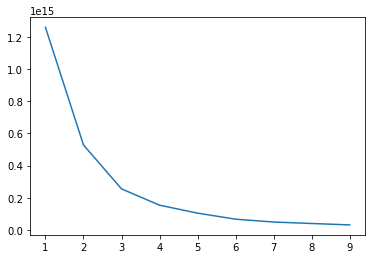

In [74]:
# Clustering data to fit separate models on the different clusters , to check if  model generalises better after clustering , or as a whole
# Finding Optimal No. of Clusters

from sklearn.cluster import KMeans

inertia=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

elbow=pd.DataFrame({'Cluster':range(1,10),'Inertia':inertia})
plt.plot(elbow.Cluster,elbow.Inertia)



In [75]:
# From the elbow curve above , it seems reasonable to choose 3 clusters

kmeans=KMeans(n_clusters=3)
kmeans.fit(data)
data['Cluster']=kmeans.predict(data)
data.head()

,Country,Manufacturing Site,Brand,Item Description,Product Group,Sub Classification,Molecule/Test Type,Dosage Form,Dosage,Managed By,Fulfill Via,Shipment Mode,dlvry_delay,dlvry_verif_time_delay,Unit_of_measure,Line Item Quantity,Pack_Price,Unit_Price,First Line Designation,Weight,Freight_Cost,Freight_cost_special,Line Item Insurance (USD),item_value,Shipment_Price,Cluster
0,1083,2,5,1,1728,1567,5,1575,710,10265,0.0,6337,0.0,0.0,3.433987,2.995732,3.401197,1083.0,1.0,2.639057,1083.0,6198,5.485285,3.938547,1571.457626,0
1,688,3172,7285,1,8550,1955,877,214,659,10265,0.0,6337,0.0,0.0,5.484797,6.908755,1.974081,688.0,1.0,5.883322,688.0,6198,5.485285,2.057932,10961.617626,0
2,1083,2,799,577,1728,1567,577,1575,1178,10265,0.0,6337,0.0,0.0,4.615121,6.216606,4.394449,1083.0,1.0,5.147494,1083.0,6198,5.485285,2.586933,41893.897626,0
3,688,2,7285,378,8550,6595,592,3532,522,10265,0.0,6337,0.0,0.0,4.110874,10.371019,1.607436,688.0,1.0,7.526179,688.0,6198,5.485285,1.662331,143607.977626,0
4,688,3172,7285,1,8550,6595,5,729,2,10265,0.0,6337,0.0,0.0,4.110874,10.545368,1.435085,688.0,1.0,8.934719,688.0,6198,5.485285,1.630459,167290.197626,0


In [76]:
data.Cluster.value_counts()

0    8898
2    1094
1      90
Name: Cluster, dtype: int64

In [77]:
# Separating the 3 data clusters

data_c1=data[data.Cluster==0].drop(['Cluster'],axis=1).copy(deep=True)
data_c2=data[data.Cluster==1].drop(['Cluster'],axis=1).copy(deep=True)
data_c3=data[data.Cluster==2].drop(['Cluster'],axis=1).copy(deep=True)

In [78]:
# Function to calculate ajusted r2 score

def adjusted_r2(r2,data):
    score=1-(1-r2)*(data.shape[0]-1)/(data.shape[0]-data.shape[1]-1)
    return score

In [79]:
# Regression models to try
# Linear regression , lasso / regularised ,SVM regressor, KNN , rand forest regressor , XGB regressor


In [80]:

#Trying LInear Regression

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score          
from sklearn.linear_model import LinearRegression

scores_linreg=[]

for i in [data,data_c1,data_c2,data_c3]:
            X=i.drop(['Shipment_Price'],axis=1)
            y=i['Shipment_Price']
            X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
            linreg=LinearRegression()
            linreg.fit(X_train,y_train)
            r2=linreg.score(X_test,y_test)
            adj_r2=adjusted_r2(r2=r2,data=i)
            scores_linreg.append((adj_r2))

print(f"Adj r2 score for Entire Data : {scores_linreg[0]}")
print(f"Adj r2 score for Data Cluster 1 : {scores_linreg[1]}")
print(f"Adj r2 score for Data Cluster 2 : {scores_linreg[2]}")
print(f"Adj r2 score for Data Cluster 3 : {scores_linreg[3]}")

Adj r2 score for Entire Data : 0.5534908360474005
Adj r2 score for Data Cluster 1 : 0.6283985195229174
Adj r2 score for Data Cluster 2 : 0.9331793696601054
Adj r2 score for Data Cluster 3 : 0.9576716725062278


In [81]:
#Trying Out Ridge Regression as all features are useful

from sklearn.linear_model import RidgeCV ,Ridge
scores_ridgereg=[]
for i in [data,data_c1,data_c2,data_c3]:

            X=i.drop(['Shipment_Price'],axis=1)
            y=i['Shipment_Price']
            X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

            alphas=np.random.uniform(low=0,high=10,size=(50,))
            ridgeCV=RidgeCV(alphas=alphas,cv=10)
            ridgeCV.fit(X_train,y_train)
            ridge_reg=Ridge(alpha=ridgeCV.alpha_)
            ridge_reg.fit(X_train,y_train)
            r2=ridge_reg.score(X_test,y_test)
            adj_r2=adjusted_r2(r2=r2,data=i)
            scores_ridgereg.append((adj_r2))

print(f"r2 score for Entire Data : {scores_ridgereg[0]}")
print(f"r2 score for Data Cluster 1 : {scores_ridgereg[1]}")
print(f"r2 score for Data Cluster 2 : {scores_ridgereg[2]}")
print(f"r2 score for Data Cluster 3 : {scores_ridgereg[3]}")

r2 score for Entire Data : 0.5649858971213673
r2 score for Data Cluster 1 : 0.6216354173006071
r2 score for Data Cluster 2 : 0.9388567696020326
r2 score for Data Cluster 3 : 0.9542373055036468


In [82]:
# #Finding best parameters for Support Vector Regression
# from sklearn.svm import LinearSVR,SVR
# svm_grid = SVR()
# parameters={
# "kernel" : ['linear', 'poly', 'rbf', 'sigmoid']
# }

# #For use of Gridsearch CV we will split data in feature and target column
# x=data.drop(['Shipment_Price'],axis=1)
# y=data['Shipment_Price']

In [83]:
# from sklearn.model_selection import GridSearchCV
# grid= GridSearchCV(svm_grid,param_grid=parameters,n_jobs=-1,cv=5,verbose=3)
# grid.fit(x,y)
# grid.best_params_

In [84]:
#According to Gridsearch best parameter will be:
{'kernel': 'linear'}

{'kernel': 'linear'}

In [85]:
#Trying Out Support Vector Regression

from sklearn.svm import LinearSVR,SVR
from sklearn.preprocessing import StandardScaler    
scaler_svm=StandardScaler()
scores_SVM_reg=[]

for i in [data,data_c1,data_c2,data_c3]:
            
            X=i.drop(['Shipment_Price'],axis=1)
            y=i['Shipment_Price']
            X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

            svm_reg=SVR(kernel="linear")
            svm_reg.fit(X_train,y_train)
            r2=svm_reg.score(X_test,y_test)
            adj_r2=adjusted_r2(r2=r2,data=i)
            scores_SVM_reg.append((adj_r2))

print(f"r2 score for Entire Data : {scores_SVM_reg[0]}")
print(f"r2 score for Data Cluster 1 : {scores_SVM_reg[1]}")
print(f"r2 score for Data Cluster 2 : {scores_SVM_reg[2]}")
print(f"r2 score for Data Cluster 3 : {scores_SVM_reg[3]}")

r2 score for Entire Data : 0.0579106471820402
r2 score for Data Cluster 1 : 0.23675619149410143
r2 score for Data Cluster 2 : -0.2735340923962357
r2 score for Data Cluster 3 : -0.005361519141600102


In [86]:
#Trying Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor , plot_tree
from sklearn.metrics import r2_score

scores_dtree_reg=[]
for i in [data,data_c1,data_c2,data_c3]:
            X=i.drop(['Shipment_Price'],axis=1)
            y=i['Shipment_Price']
            X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)
            dtree_reg=DecisionTreeRegressor()
            dtree_reg.fit(X_train,y_train)
            pred=dtree_reg.predict(X_test)
            r2=r2_score(y_test,pred)
            adj_r2=adjusted_r2(r2=r2,data=i)
            scores_dtree_reg.append((adj_r2))
        
print(f"r2 score for Entire Data  : {scores_dtree_reg[0]}")
print(f"r2 score for Data Cluster 1 : {scores_dtree_reg[1]}")
print(f"r2 score for Data Cluster 2 : {scores_dtree_reg[2]}")
print(f"r2 score for Data Cluster 3 : {scores_dtree_reg[3]}")

r2 score for Entire Data  : 0.976675037281828
r2 score for Data Cluster 1 : 0.9496982829248842
r2 score for Data Cluster 2 : 0.7011352385080019
r2 score for Data Cluster 3 : 0.7624849707321342


In [87]:
# #Finding best parameters for Random Forest Regressor
# from sklearn.ensemble import RandomForestRegressor
# rand_grid = RandomForestRegressor()
# parameters = {
# "criterion" : ["gini", "entropy"],
# "criterion":["mse", "mae"],
# "n_estimators":[10,20,30,40],
# "max_depth":range(2,40,1),
# "min_samples_leaf":range(1,10,1),
# "max_features" :[None,"auto", "sqrt", "log2",1],
# "max_leaf_nodes":[None,range(1,10,1)]
# }

# #For use of Gridsearch CV we will split data in feature and target column
# x=data.drop(['Shipment_Price'],axis=1)
# y=data['Shipment_Price']

# grid= GridSearchCV(rand_grid,param_grid=parameters,n_jobs=-1,cv=5,verbose=3)
# grid.fit(x,y)
# grid.best_params_

In [88]:
#According to Gridsearch best parameter will be:
{"min_samples_leaf":10,"n_estimators":30}

{'min_samples_leaf': 10, 'n_estimators': 30}

In [89]:
#Trying Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

scores_rand_forest=[]
for i in [data,data_c1,data_c2,data_c3]:
            X=i.drop(['Shipment_Price'],axis=1)
            y=i['Shipment_Price']
            X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)
            rand_forest=RandomForestRegressor(min_samples_leaf=10,n_estimators=30,n_jobs=-1)
            rand_forest.fit(X_train,y_train)
            pred=rand_forest.predict(X_test)
            r2=r2_score(y_test,pred)
            adj_r2=adjusted_r2(r2=r2,data=i)
            scores_rand_forest.append((adj_r2))
            
            
print(f"r2 score for Entire Data : {scores_rand_forest[0]}")
print(f"r2 score for Data Cluster 1 : {scores_rand_forest[1]}")
print(f"r2 score for Data Cluster 2 : {scores_rand_forest[2]}")
print(f"r2 score for Data Cluster 3 : {scores_rand_forest[3]}")


r2 score for Entire Data : 0.9607942084207994
r2 score for Data Cluster 1 : 0.9634639759902767
r2 score for Data Cluster 2 : 0.440055393933906
r2 score for Data Cluster 3 : 0.8676373072902264


In [90]:
# #Finding best parameters for XGB Regressor
# from sklearn.ensemble import XGBRegressor
# xgb_grid =XGBRegressor()
# parameters ={
#         'min_child_weight':[1,5,10],
#         'gamma':[0.5,1,1.5,2,5],
#         'subsample':[0.6,0.7,0.8,0.9,1.0],
#         'colsample_bytree':[0.6,0.8,1.0],
#         'max_depth':[3,4,8,9],
#         "eta":[0.1,0.2,0.3]
#         }

# #For use of Gridsearch CV we will split data in feature and target column
# x=data.drop(['Shipment_Price'],axis=1)
# y=data['Shipment_Price']

# grid= GridSearchCV(xgb_grid,param_grid=parameters,n_jobs=-1,cv=5,verbose=3)
# grid.fit(x,y)
# grid.best_params_

In [91]:
#According to Gridsearch best parameter will be:
{"subsample":0.7,"max_depth":9,"colsample_bytree":0.8,"eta":0.1}

{'subsample': 0.7, 'max_depth': 9, 'colsample_bytree': 0.8, 'eta': 0.1}

In [92]:
#Trying XGBoost Regressor

from xgboost import XGBRegressor 

scores_xgb=[]
for i in [data,data_c1,data_c2,data_c3]:
            X=i.drop(['Shipment_Price'],axis=1)
            y=i['Shipment_Price']
            X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)
            xgb_reg=XGBRegressor(subsample=0.7,max_depth=9,colsample_bytree=0.8,eta=0.1)
            xgb_reg.fit(X_train,y_train)
            pred=xgb_reg.predict(X_test)
            r2=r2_score(y_test,pred)
            adj_r2=adjusted_r2(r2=r2,data=i)
            scores_xgb.append((adj_r2))
            
print(f"r2 score for Entire Data : {scores_xgb[0]}")
print(f"r2 score for Data Cluster 1 : {scores_xgb[1]}")
print(f"r2 score for Data Cluster 2 : {scores_xgb[2]}")
print(f"r2 score for Data Cluster 3 : {scores_xgb[3]}")


r2 score for Entire Data : 0.9911132776106754
r2 score for Data Cluster 1 : 0.9838918048599852
r2 score for Data Cluster 2 : 0.854100809571863
r2 score for Data Cluster 3 : 0.9439866517857154


In [93]:
#Trying KNN Regression

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler    

scaler_knn=StandardScaler()
scores_KNN_reg=[]

for i in [data,data_c1,data_c2,data_c3]:
            scaler_knn.fit(i.drop(['Shipment_Price'],axis=1))
            X=scaler_knn.transform(i.drop(['Shipment_Price'],axis=1))
            y=i['Shipment_Price']
            X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)
            knn=KNeighborsRegressor(n_neighbors=10)
            knn.fit(X_train,y_train)
            r2=knn.score(X_test,y_test)
            adj_r2=adjusted_r2(r2=r2,data=i)
            scores_KNN_reg.append((adj_r2))
            
print(f"r2 score for Entire Data : {scores_KNN_reg[0]}")
print(f"r2 score for Data Cluster 1 : {scores_KNN_reg[1]}")
print(f"r2 score for Data Cluster 2 : {scores_KNN_reg[2]}")
print(f"r2 score for Data Cluster 3 : {scores_KNN_reg[3]}")

r2 score for Entire Data : 0.8289119345479415
r2 score for Data Cluster 1 : 0.7604865346682357
r2 score for Data Cluster 2 : 0.21268062741677662
r2 score for Data Cluster 3 : 0.5799570094030543


In [99]:
scores=pd.DataFrame([scores_linreg,scores_ridgereg,scores_SVM_reg,scores_dtree_reg,scores_rand_forest,scores_KNN_reg,scores_xgb]
             ,index=['Linreg-r2','Ridge-r2','SVR-r2','Dtree-r2','Rand-Forest-r2','KNN-r2',"XGB-r2"],
             columns=['Entire Data','Cluster 1','Cluster 2','Cluster 3'])
scores

,Entire Data,Cluster 1,Cluster 2,Cluster 3
Linreg-r2,0.553491,0.628399,0.933179,0.957672
Ridge-r2,0.564986,0.621635,0.938857,0.954237
SVR-r2,0.057911,0.236756,-0.273534,-0.005362
Dtree-r2,0.976675,0.949698,0.701135,0.762485
Rand-Forest-r2,0.960794,0.963464,0.440055,0.867637
KNN-r2,0.828912,0.760487,0.212681,0.579957
XGB-r2,0.991113,0.983892,0.854101,0.943987


In [4]:
# So, Best model is XGB Regression
X=data.drop(['Shipment_Price'],axis=1)
y=data['Shipment_Price']
xgb_reg=XGBRegressor(subsample=0.7,max_depth=9,colsample_bytree=0.8,eta=0.1)
cv_score= cross_val_score(xgb_reg,X,y,cv=10)
cv_score


array([0.97373443, 0.9753548 , 0.99139551, 0.99106545, 0.99168438,
       0.98985781, 0.99220637, 0.9842427 , 0.99177708, 0.9896052 ])

In [9]:
X=data.drop(['Shipment_Price',"Cluster"],axis=1)
y=data['Shipment_Price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)
xgb_reg=XGBRegressor(subsample=0.7,max_depth=9,colsample_bytree=0.8,eta=0.1)
xgb_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, enable_categorical=False,
             eta=0.1, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.100000001,
             max_delta_step=0, max_depth=9, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [10]:
import pickle
filename="xgboostr1.pickle"
pickle.dump(xgb_reg,open(filename,'wb'))

model=pickle.load(open(filename,'rb'))
pred=model.predict(X_test)
r2_score(y_test,pred)

0.9892959740474334

In [7]:
dill.dump_session('shipment.db')

[0.5534908360474005,
 0.6283985195229174,
 0.9331793696601054,
 0.9576716725062278]

In [7]:
X_test

,Country,Manufacturing Site,Brand,Item Description,Product Group,Sub Classification,Molecule/Test Type,Dosage Form,Dosage,Managed By,...,Line Item Quantity,Pack_Price,Unit_Price,First Line Designation,Weight,Freight_Cost,Freight_cost_special,Line Item Insurance (USD),item_value,Cluster
1249,155,2,113,1,1728,1567,5,1575,2,10265,...,8.987322,3.044522,155.0,1.0,7.769379,155.0,6198,5.549076,1.950749,0
1760,631,665,7285,1,8550,6595,5,2749,2,10265,...,9.210440,1.098612,631.0,0.0,8.138986,631.0,2445,3.496508,1.454876,0
4064,688,665,7285,580,8550,6595,707,2749,710,10265,...,9.283870,2.208274,688.0,1.0,7.303843,688.0,6198,4.689787,1.730468,0
3002,80,665,7285,1,8550,1955,453,727,2,10265,...,8.419580,2.251292,80.0,1.0,7.397562,80.0,6198,4.007878,1.730173,0
7399,1083,540,7285,580,8550,6595,707,2749,710,10265,...,11.512935,2.209373,1083.0,1.0,9.409191,1083.0,6198,6.727084,1.766110,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7290,779,2,7285,301,8550,6595,5,2749,350,10265,...,7.330405,1.759581,779.0,0.0,8.138986,779.0,2445,2.423031,1.544746,0
7531,655,3172,7285,317,8550,6595,529,3532,1178,10265,...,7.832411,2.105353,655.0,1.0,4.983607,655.0,6198,3.693120,1.723691,0
4348,1406,3172,7285,1,8550,6595,5,3532,1178,10265,...,11.781432,2.034706,1406.0,1.0,9.409929,1406.0,6198,7.269756,1.777865,2
6941,1083,540,7285,1,8550,1955,1125,3532,1101,10265,...,8.672657,2.332144,1083.0,1.0,5.852202,1083.0,6198,4.222151,1.743949,0


In [8]:
x

,Country,Manufacturing Site,Brand,Item Description,Product Group,Sub Classification,Molecule/Test Type,Dosage Form,Dosage,Managed By,...,Line Item Quantity,Pack_Price,Unit_Price,First Line Designation,Weight,Freight_Cost,Freight_cost_special,Line Item Insurance (USD),item_value,Cluster
0,1083,2,5,1,1728,1567,5,1575,710,10265,...,2.995732,3.401197,1083.0,1.0,2.639057,1083.0,6198,5.485285,3.938547,0
1,688,3172,7285,1,8550,1955,877,214,659,10265,...,6.908755,1.974081,688.0,1.0,5.883322,688.0,6198,5.485285,2.057932,0
2,1083,2,799,577,1728,1567,577,1575,1178,10265,...,6.216606,4.394449,1083.0,1.0,5.147494,1083.0,6198,5.485285,2.586933,0
3,688,2,7285,378,8550,6595,592,3532,522,10265,...,10.371019,1.607436,688.0,1.0,7.526179,688.0,6198,5.485285,1.662331,0
4,688,3172,7285,1,8550,6595,5,729,2,10265,...,10.545368,1.435085,688.0,1.0,8.934719,688.0,6198,5.485285,1.630459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,538,2,7285,1,8550,1955,707,239,2,10265,...,12.023183,1.526056,538.0,0.0,8.138986,538.0,2445,6.560734,1.652212,2
10320,1083,869,7285,597,8550,6595,689,2749,739,10265,...,9.955748,2.017566,1083.0,0.0,8.138986,1083.0,2445,5.091969,1.699777,0
10321,683,2,7285,1,8550,6595,5,2749,2,10265,...,13.151003,2.396986,683.0,0.0,8.138986,683.0,1442,8.572635,1.826874,1
10322,538,1415,7285,597,8550,6595,689,2749,739,10265,...,9.768011,2.017566,538.0,1.0,7.239215,538.0,1442,4.905497,1.694135,0
